## Proyecto 3. Entrega 1
### Analsisis Exploratorio Natalidad
Diego Duarte 22075 - José Marchena 22398 - Andrés Kou 22305 - Esteban Zambrano 22119

In [21]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import os

In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Analisis de Variables

#### Función para clasificar tipo de variable

In [23]:
path = "./data/nat"
files = os.listdir(path)
print("Archivos en la carpeta:", files)

dfs = {file[:-4]: pd.read_csv(os.path.join(path, file)) for file in files if file.endswith(".csv")}

Archivos en la carpeta: ['NatDepEC.csv', 'NatDepMes.csv', 'NatEdad.csv', 'NatEdadEC.csv', 'NatEscolaridad.csv', 'NatNum.csv', 'NatOcup.csv']


#### Iterar y mostrar información de cada dataset

In [24]:
def clasificar_variable(tipo, nombre_columna):
    nombre_columna = nombre_columna.strip().lower()
    if nombre_columna in ['anio', 'mes']:
        return 'Cualitativa'
    elif tipo in ['object', 'category']:
        return 'Cualitativa'
    elif tipo in ['int64', 'float64']:
        return 'Cuantitativa'
    else:
        return 'Otro'

def describir_dataset_v2(df, nombre):
    tipos = df.dtypes
    resumen = []

    for col in df.columns:
        tipo = tipos[col]
        clasif = clasificar_variable(tipo, col)
        unicos = df[col].nunique()
        resumen.append((col, tipo, unicos, clasif))

    resumen_df = pd.DataFrame(resumen, columns=["Variable", "Tipo (dtype)", "Valores únicos", "Clasificación"])
    display(resumen_df)

    # Imprimir los datos extra como en tu imagen
    print(f"\nAnálisis del dataset: {nombre}")
    print(f"Dimensiones: {df.shape[0]} filas, {df.shape[1]} columnas\n")

# Aplicar la función a todos los datasets
for nombre, df in dfs.items():
    describir_dataset_v2(df, nombre)


Variable Tipo (dtype)  Valores únicos Clasificación
0  Departamento de residencia       object              25   Cualitativa
1                       Total        int64             320  Cuantitativa
2                     Soltera        int64             322  Cuantitativa
3                      Casada        int64             312  Cuantitativa
4                       Unida        int64             102  Cuantitativa
5                    Ignorado        int64              59  Cuantitativa
6                        Anio        int64              13   Cualitativa


Análisis del dataset: NatDepEC
Dimensiones: 325 filas, 7 columnas



Variable Tipo (dtype)  Valores únicos Clasificación
0                         Mes       object              13   Cualitativa
1  Departamento de residencia       object              25   Cualitativa
2                       Total        int64            2289  Cuantitativa
3                     Hombres        int64            1739  Cuantitativa
4                     Mujeres        int64            1709  Cuantitativa
5                        Anio        int64              13   Cualitativa


Análisis del dataset: NatDepMes
Dimensiones: 4225 filas, 6 columnas



Variable Tipo (dtype)  Valores únicos Clasificación
0             Edad       object              52   Cualitativa
1            Total        int64             534  Cuantitativa
2        Guatemala        int64             440  Cuantitativa
3      El Progreso        int64             234  Cuantitativa
4     Sacatepéquez        int64             272  Cuantitativa
5    Chimaltenango        int64             366  Cuantitativa
6        Escuintla        int64             357  Cuantitativa
7       Santa Rosa        int64             302  Cuantitativa
8           Sololá        int64             317  Cuantitativa
9      Totonicapán        int64             348  Cuantitativa
10  Quetzaltenango        int64             378  Cuantitativa
11   Suchitepéquez        int64             355  Cuantitativa
12      Retalhuleu        int64             297  Cuantitativa
13      San Marcos        int64             417  Cuantitativa
14   Huehuetenango        int64             416  Cuantitativa
15          Quiché        int64             412  Cuantitativa
16    Baja Verapaz        int64             301  Cuantitativa
17    Alta Verapaz        int64             420  Cuantitativa
18           Petén        int64             366  Cuantitativa
19          Izabal        int64             334  Cuantitativa
20          Zacapa        int64             270  Cuantitativa
21      Chiquimula        int64             338  Cuantitativa
22          Jalapa        int64             307  Cuantitativa
23         Jutiapa        int64             331  Cuantitativa
24      Extranjero        int64              38  Cuantitativa
25        Ignorado        int64              32  Cuantitativa
26            Anio        int64              13   Cualitativa


Análisis del dataset: NatEdad
Dimensiones: 668 filas, 27 columnas



Variable Tipo (dtype)  Valores únicos Clasificación
0  Grupos de edad       object              11   Cualitativa
1           Total        int64             267  Cuantitativa
2      Soltero(a)        int64             276  Cuantitativa
3       Casado(a)        int64             257  Cuantitativa
4        Unido(a)        int64             165  Cuantitativa
5        Ignorado        int64             106  Cuantitativa
6   Madre o Padre       object               2   Cualitativa
7            Anio        int64              13   Cualitativa


Análisis del dataset: NatEdadEC
Dimensiones: 286 filas, 8 columnas



Variable Tipo (dtype)  Valores únicos Clasificación
0   Número de hijos(as)       object              20   Cualitativa
1                 Total        int64             215  Cuantitativa
2               Ninguno        int64             215  Cuantitativa
3              Primaria        int64             199  Cuantitativa
4                Básica        int64             133  Cuantitativa
5         Diversificado        int64             120  Cuantitativa
6         Universitario        int64              93  Cuantitativa
7            Post Grado      float64              23  Cuantitativa
8             Doctorado      float64               6  Cuantitativa
9              Ignorado        int64             146  Cuantitativa
10                 Anio        int64              12   Cualitativa
11           Post grado      float64              19  Cuantitativa


Análisis del dataset: NatEscolaridad
Dimensiones: 232 filas, 12 columnas



Variable Tipo (dtype)  Valores únicos Clasificación
0   Edad de la madre       object              52   Cualitativa
1              Total        int64             534  Cuantitativa
2                  1        int64             445  Cuantitativa
3                  2        int64             419  Cuantitativa
4                  3        int64             389  Cuantitativa
5                  4        int64             365  Cuantitativa
6                  5        int64             331  Cuantitativa
7                  6        int64             305  Cuantitativa
8                  7        int64             265  Cuantitativa
9                  8        int64             239  Cuantitativa
10                 9        int64             213  Cuantitativa
11          10 y más        int64             214  Cuantitativa
12          Ignorado        int64             259  Cuantitativa
13              Anio        int64              13   Cualitativa


Análisis del dataset: NatNum
Dimensiones: 668 filas, 14 columnas



Variable Tipo (dtype)  Valores únicos Clasificación
0   Grupos ocupacionales       object              15   Cualitativa
1                  Total        int64             161  Cuantitativa
2            Menos de 15        int64              52  Cuantitativa
3                15 - 19        int64             136  Cuantitativa
4                20 - 24        int64             152  Cuantitativa
5                25 - 29        int64             154  Cuantitativa
6                30 - 34        int64             152  Cuantitativa
7                35 - 39        int64             146  Cuantitativa
8                40 - 44        int64             125  Cuantitativa
9                45 - 49        int64              55  Cuantitativa
10              50 y más        int64              35  Cuantitativa
11              Ignorado        int64              51  Cuantitativa
12                  Anio        int64              13   Cualitativa


Análisis del dataset: NatOcup
Dimensiones: 169 filas, 13 columnas



### Análisis de Normalidad

********************************************************************************************

🔹 **Analizando archivo: NatDepEC**

Estadístico de prueba (ks_statistic) = 0.21390544249239829000
p-value = 0.00000000000052275624
Se rechaza la hipótesis nula: los datos de 'NatDepEC - Total' NO provienen de una distribución normal.



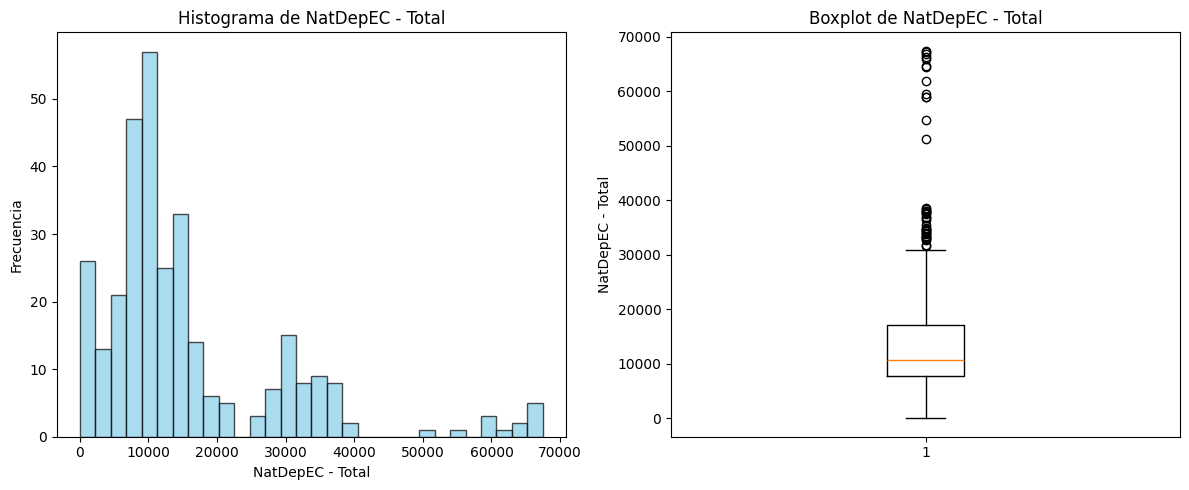

Estadístico de prueba (ks_statistic) = 0.24535797019600008584
p-value = 0.00000000000000005021
Se rechaza la hipótesis nula: los datos de 'NatDepEC - Soltera' NO provienen de una distribución normal.



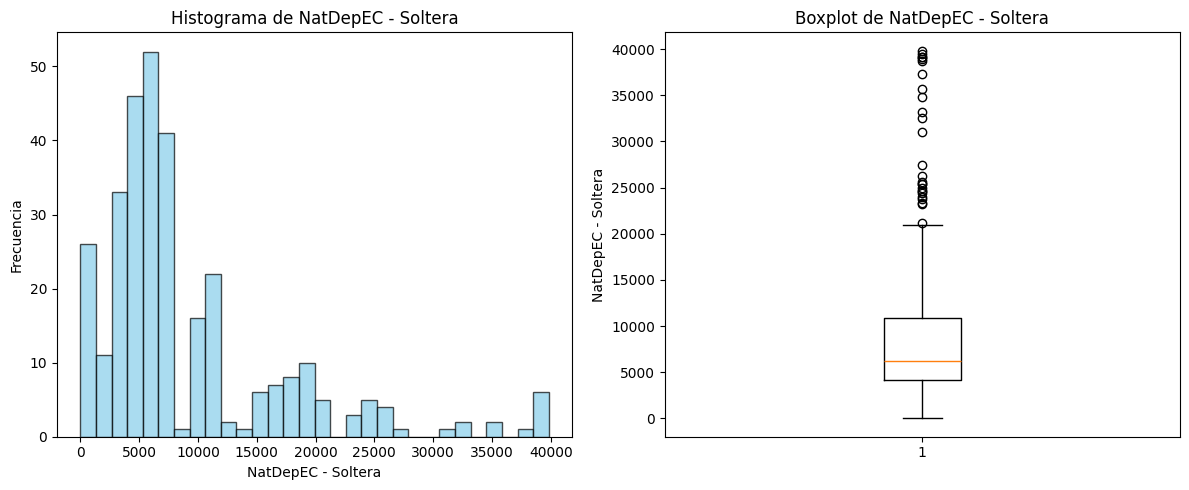

⚠️ La columna 'Casada' tiene 7 ceros en el archivo 'NatDepEC'.
Estadístico de prueba (ks_statistic) = 0.18945488269628329991
p-value = 0.00000000046399702704
Se rechaza la hipótesis nula: los datos de 'NatDepEC - Casada' NO provienen de una distribución normal.



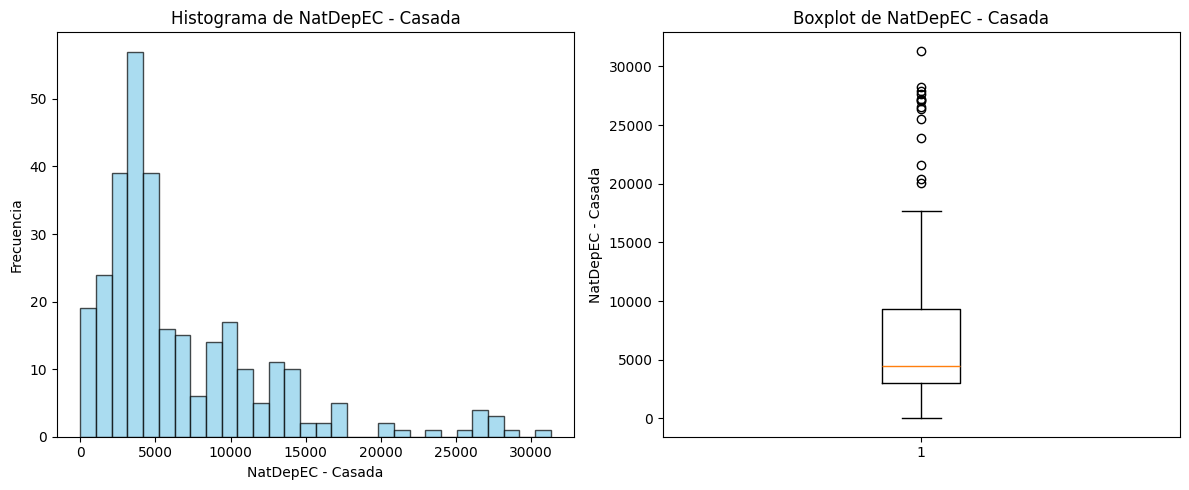

⚠️ La columna 'Unida' tiene 47 ceros en el archivo 'NatDepEC'.
Estadístico de prueba (ks_statistic) = 0.34137161270980681538
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatDepEC - Unida' NO provienen de una distribución normal.



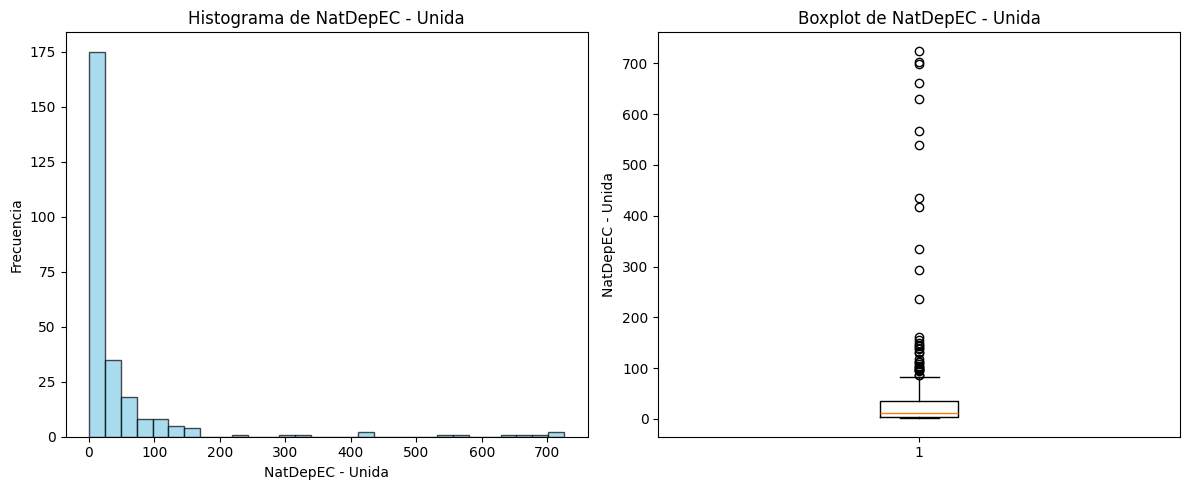

⚠️ La columna 'Ignorado' tiene 36 ceros en el archivo 'NatDepEC'.
Estadístico de prueba (ks_statistic) = 0.29662852983845422461
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatDepEC - Ignorado' NO provienen de una distribución normal.



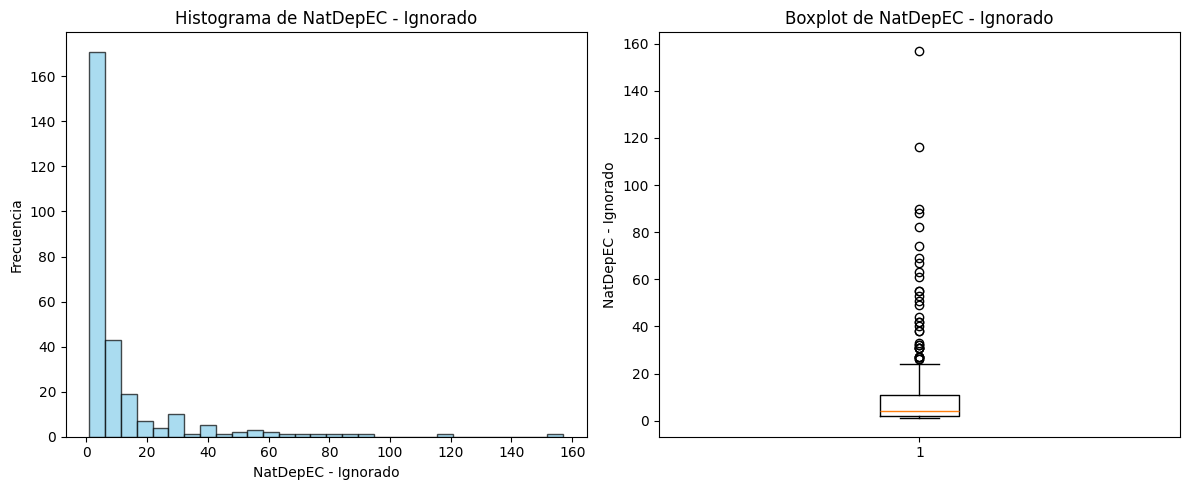

********************************************************************************************

🔹 **Analizando archivo: NatDepMes**

⚠️ La columna 'Total' tiene 4 ceros en el archivo 'NatDepMes'.
Estadístico de prueba (ks_statistic) = 0.20063799344953092696
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatDepMes - Total' NO provienen de una distribución normal.



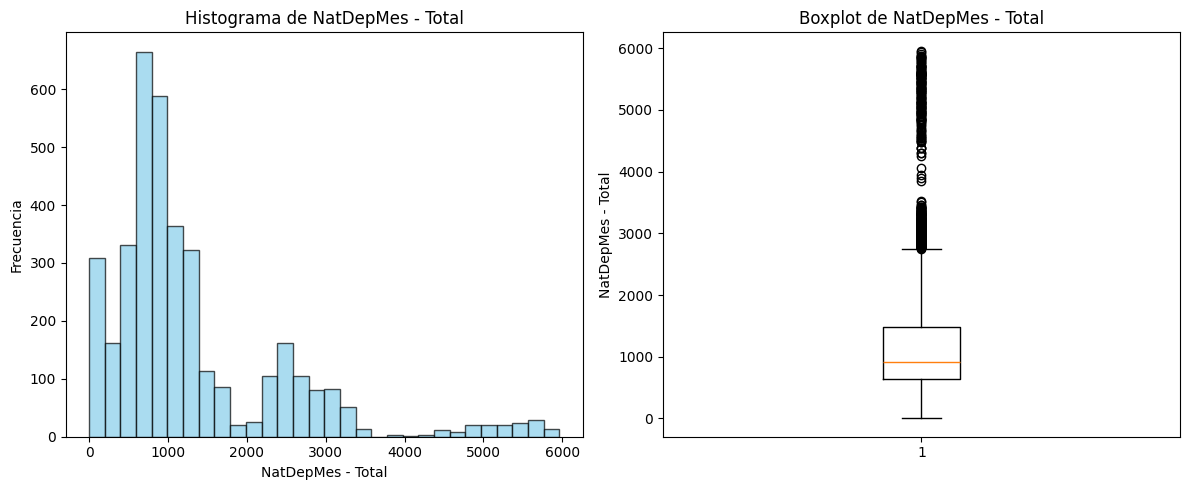

⚠️ La columna 'Hombres' tiene 20 ceros en el archivo 'NatDepMes'.
Estadístico de prueba (ks_statistic) = 0.19981474079006134037
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatDepMes - Hombres' NO provienen de una distribución normal.



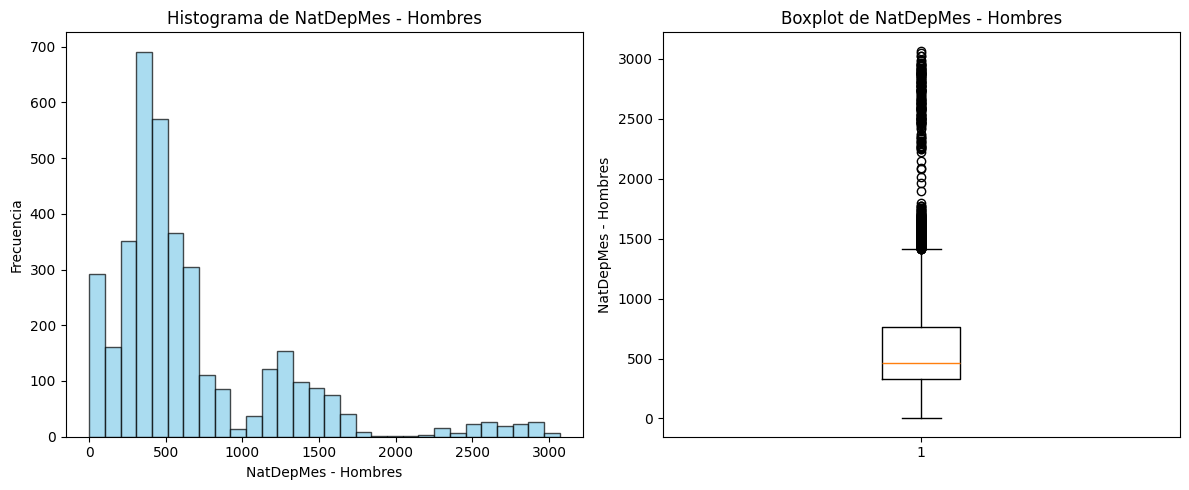

⚠️ La columna 'Mujeres' tiene 18 ceros en el archivo 'NatDepMes'.
Estadístico de prueba (ks_statistic) = 0.19889093408591296264
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatDepMes - Mujeres' NO provienen de una distribución normal.



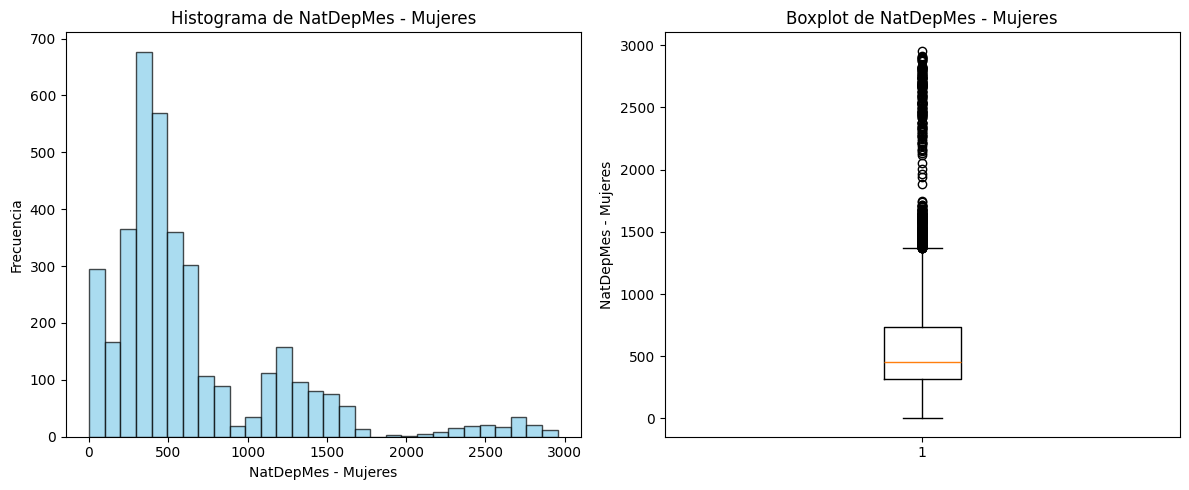

********************************************************************************************

🔹 **Analizando archivo: NatEdad**

Estadístico de prueba (ks_statistic) = 0.19937147327842347222
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEdad - Total' NO provienen de una distribución normal.



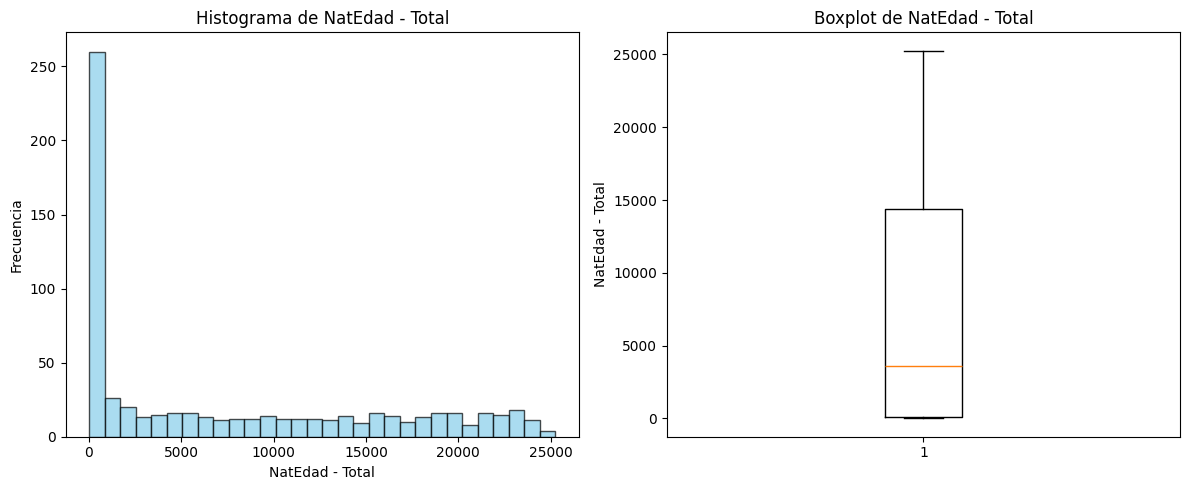

⚠️ La columna 'Guatemala' tiene 82 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.17495758131312416639
p-value = 0.00000000000000082382
Se rechaza la hipótesis nula: los datos de 'NatEdad - Guatemala' NO provienen de una distribución normal.



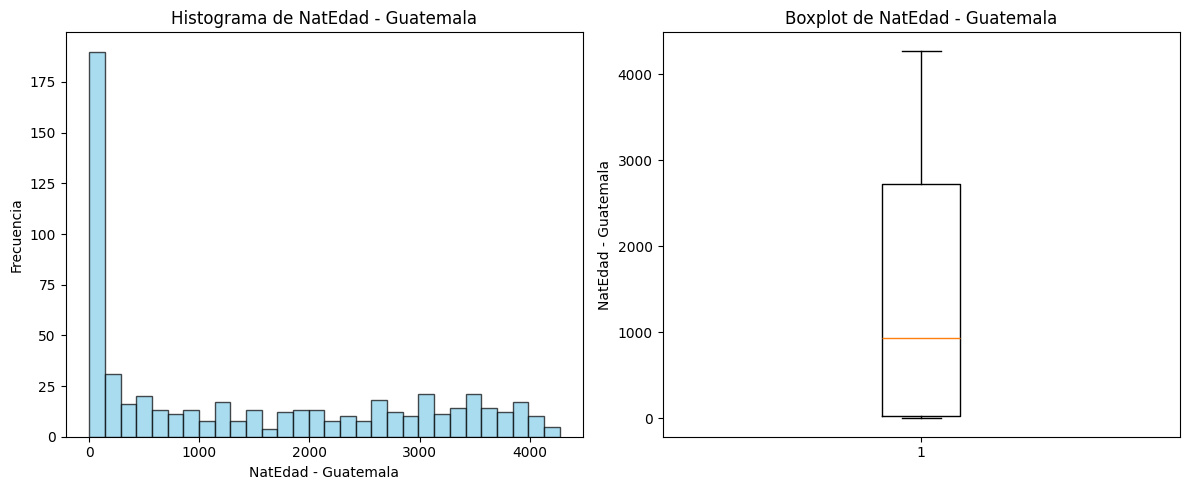

⚠️ La columna 'El Progreso' tiene 181 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.12389456335089649164
p-value = 0.00000084437754237621
Se rechaza la hipótesis nula: los datos de 'NatEdad - El Progreso' NO provienen de una distribución normal.



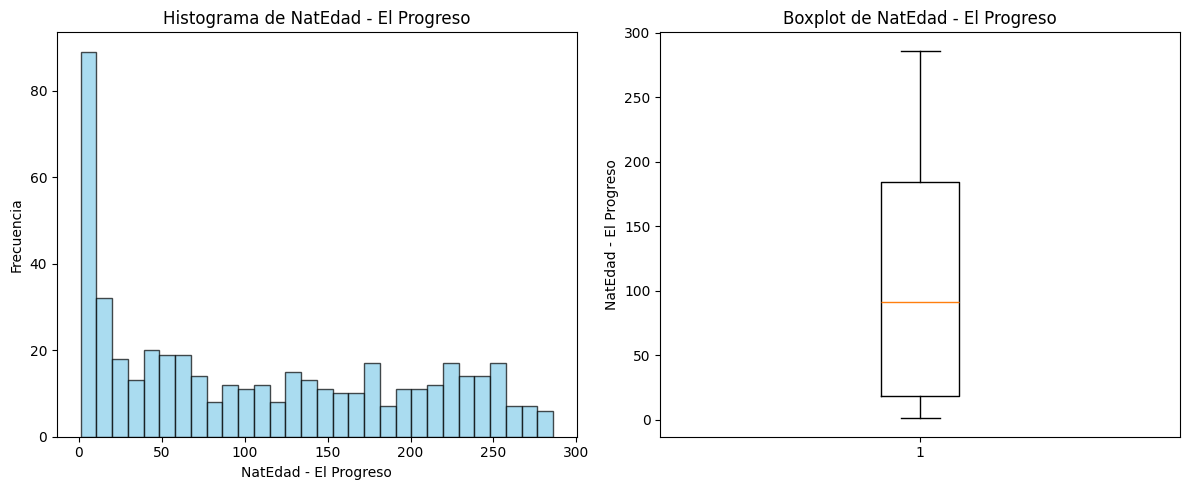

⚠️ La columna 'Sacatepéquez' tiene 177 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13392308687479492768
p-value = 0.00000006152615949316
Se rechaza la hipótesis nula: los datos de 'NatEdad - Sacatepéquez' NO provienen de una distribución normal.



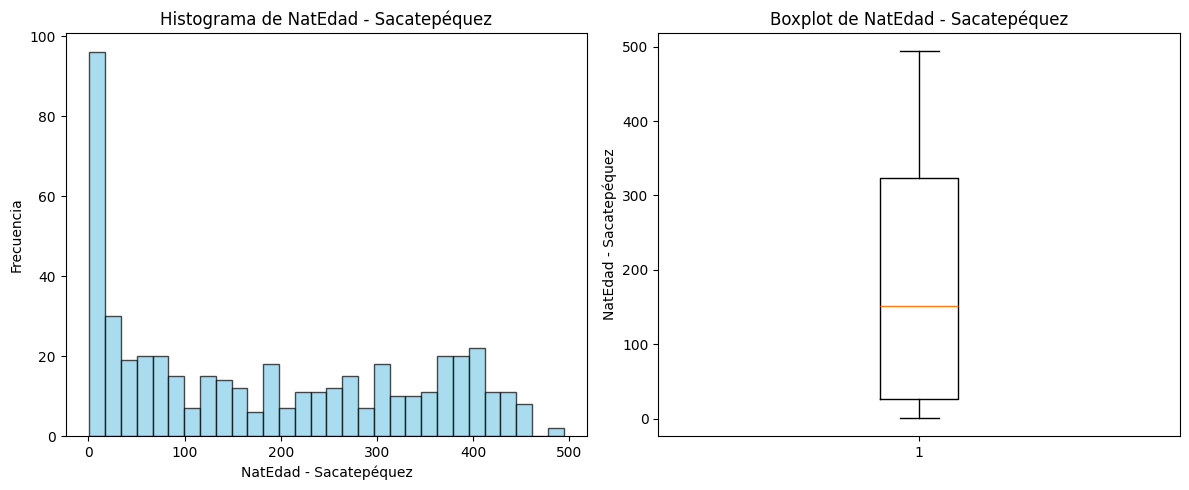

⚠️ La columna 'Chimaltenango' tiene 141 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13334903733898595402
p-value = 0.00000001973174648721
Se rechaza la hipótesis nula: los datos de 'NatEdad - Chimaltenango' NO provienen de una distribución normal.



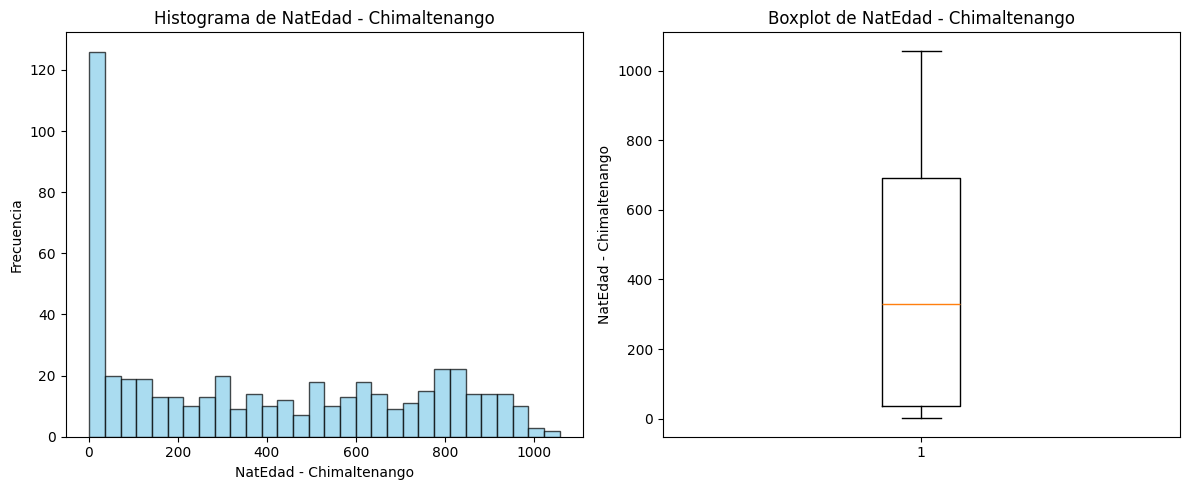

⚠️ La columna 'Escuintla' tiene 127 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.16041930213299043784
p-value = 0.00000000000244715424
Se rechaza la hipótesis nula: los datos de 'NatEdad - Escuintla' NO provienen de una distribución normal.



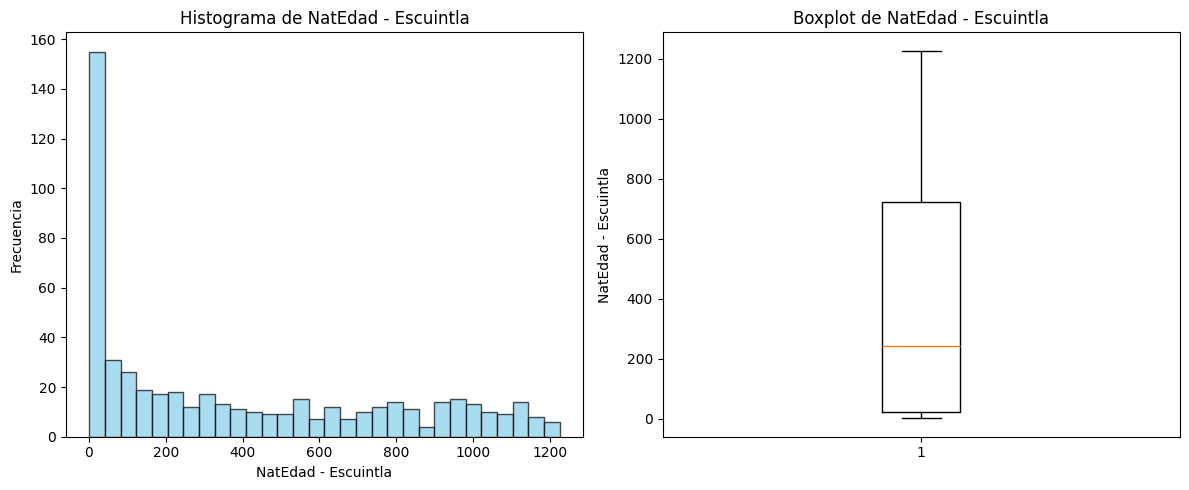

⚠️ La columna 'Santa Rosa' tiene 149 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13292909310298983705
p-value = 0.00000002943480333741
Se rechaza la hipótesis nula: los datos de 'NatEdad - Santa Rosa' NO provienen de una distribución normal.



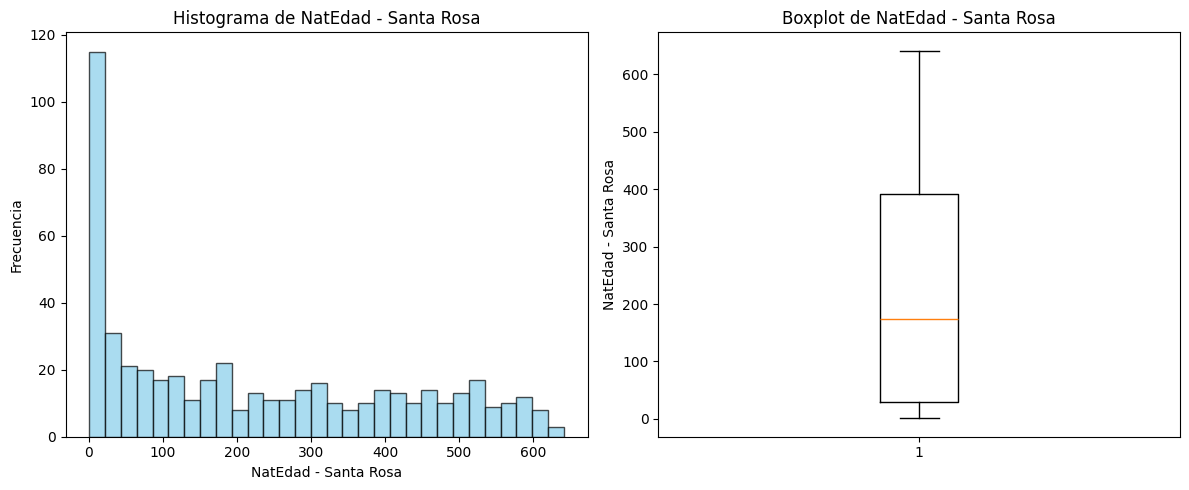

⚠️ La columna 'Sololá' tiene 126 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13817270419850946617
p-value = 0.00000000284836340096
Se rechaza la hipótesis nula: los datos de 'NatEdad - Sololá' NO provienen de una distribución normal.



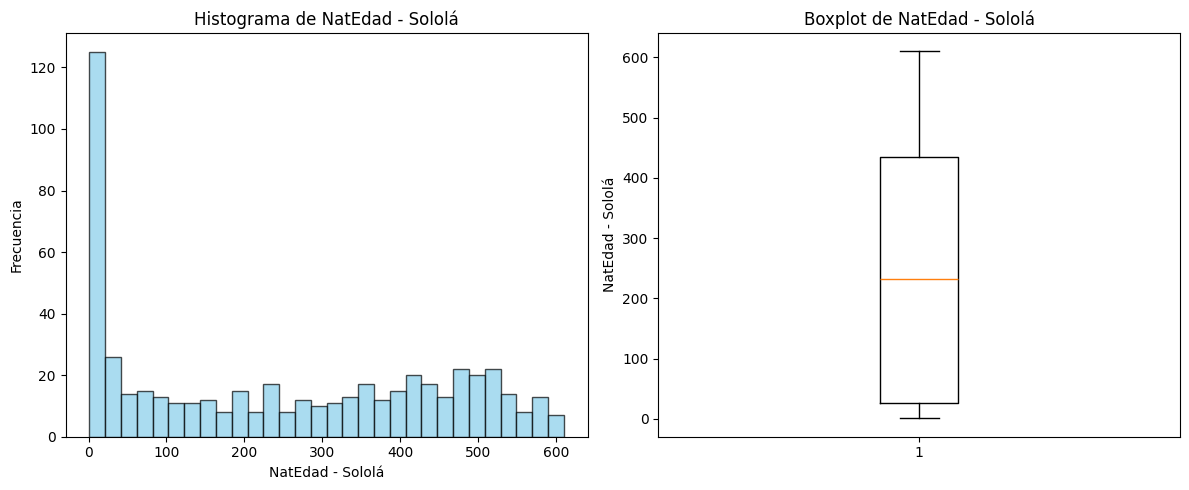

⚠️ La columna 'Totonicapán' tiene 107 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13687132106959437605
p-value = 0.00000000204320174963
Se rechaza la hipótesis nula: los datos de 'NatEdad - Totonicapán' NO provienen de una distribución normal.



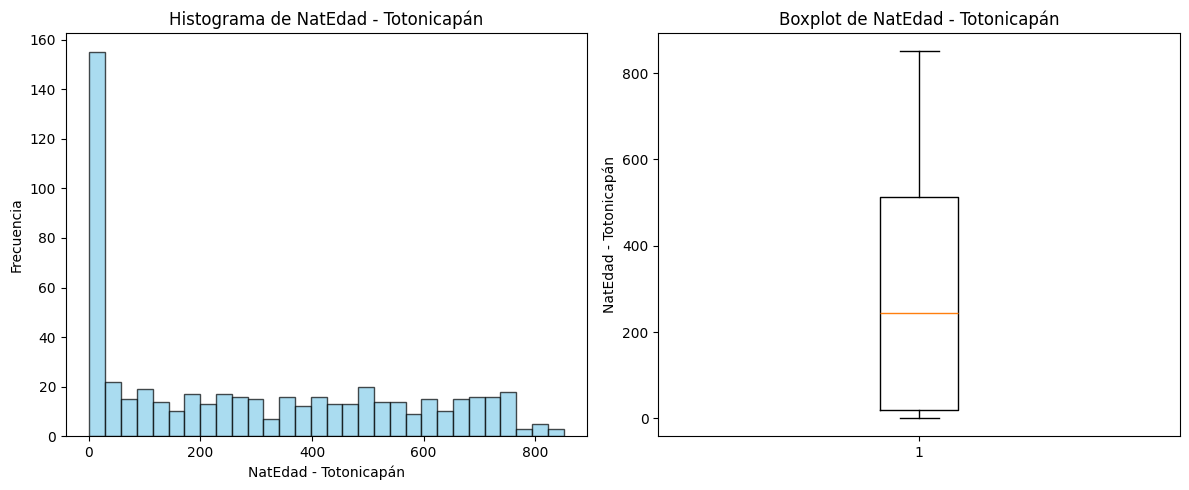

⚠️ La columna 'Quetzaltenango' tiene 104 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.15011434771556003698
p-value = 0.00000000002643941350
Se rechaza la hipótesis nula: los datos de 'NatEdad - Quetzaltenango' NO provienen de una distribución normal.



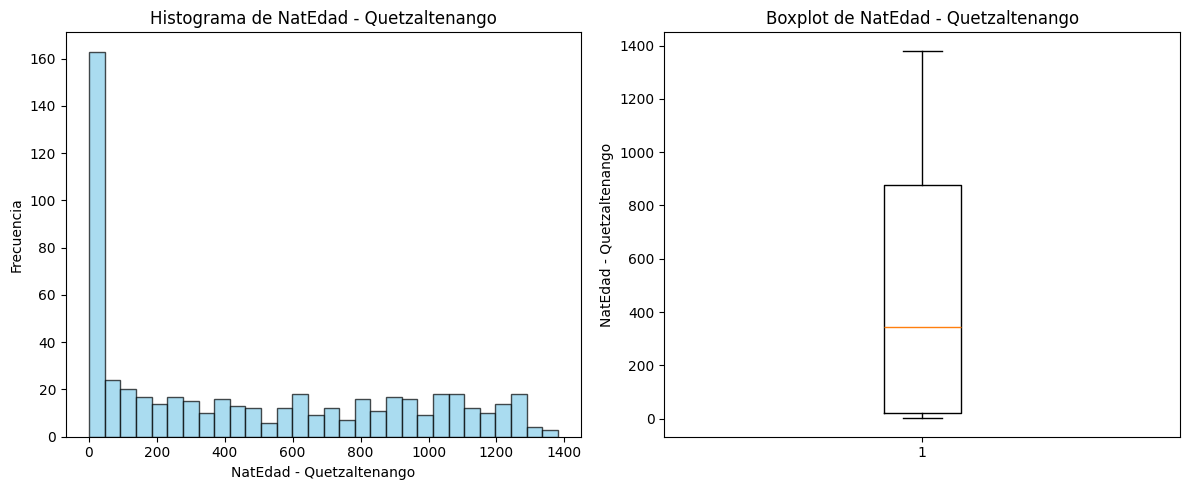

⚠️ La columna 'Suchitepéquez' tiene 128 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.14712232717114154257
p-value = 0.00000000020242072925
Se rechaza la hipótesis nula: los datos de 'NatEdad - Suchitepéquez' NO provienen de una distribución normal.



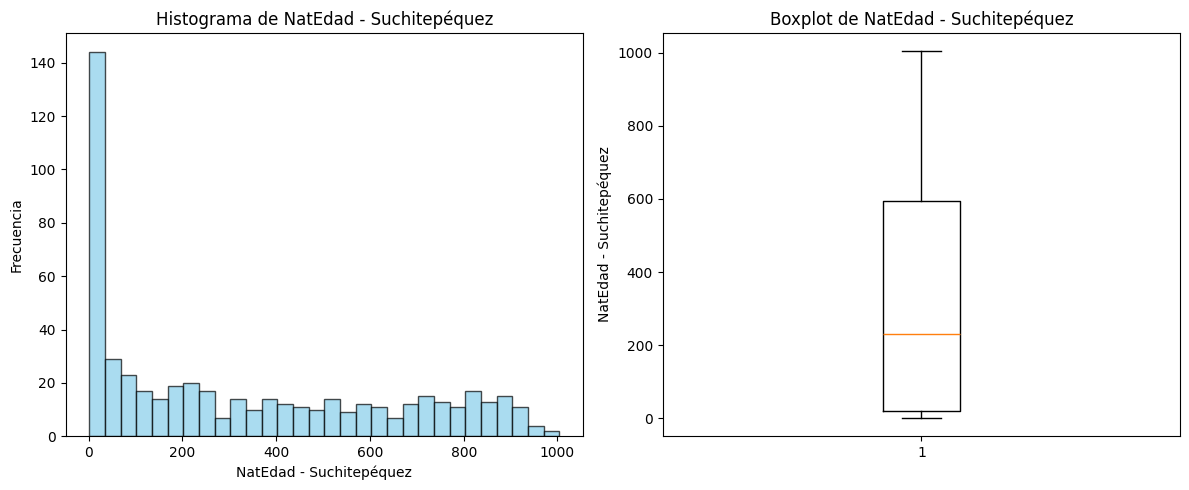

⚠️ La columna 'Retalhuleu' tiene 151 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13912262019372406696
p-value = 0.00000000568072365204
Se rechaza la hipótesis nula: los datos de 'NatEdad - Retalhuleu' NO provienen de una distribución normal.



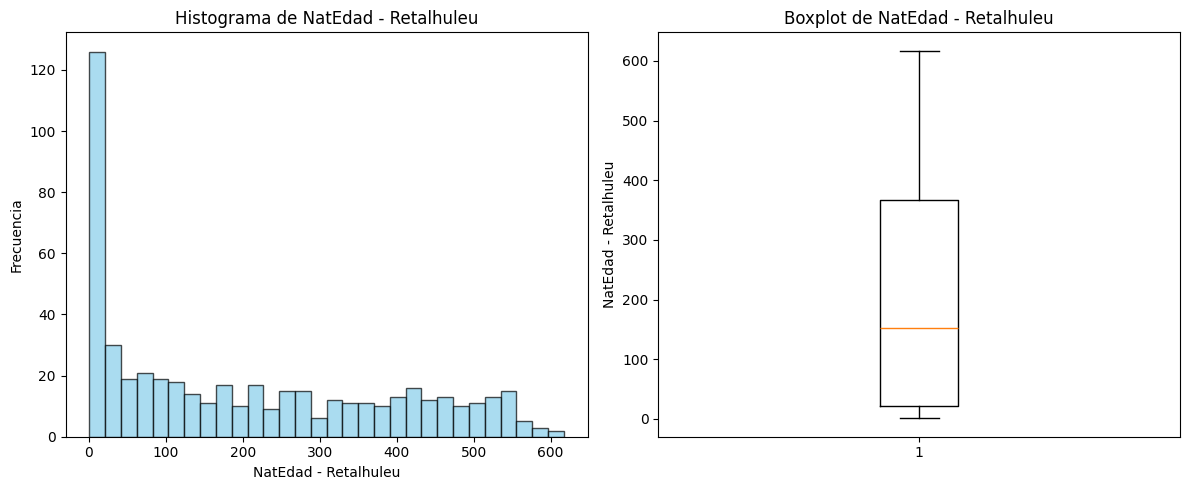

⚠️ La columna 'San Marcos' tiene 56 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.16744375121199944756
p-value = 0.00000000000000378371
Se rechaza la hipótesis nula: los datos de 'NatEdad - San Marcos' NO provienen de una distribución normal.



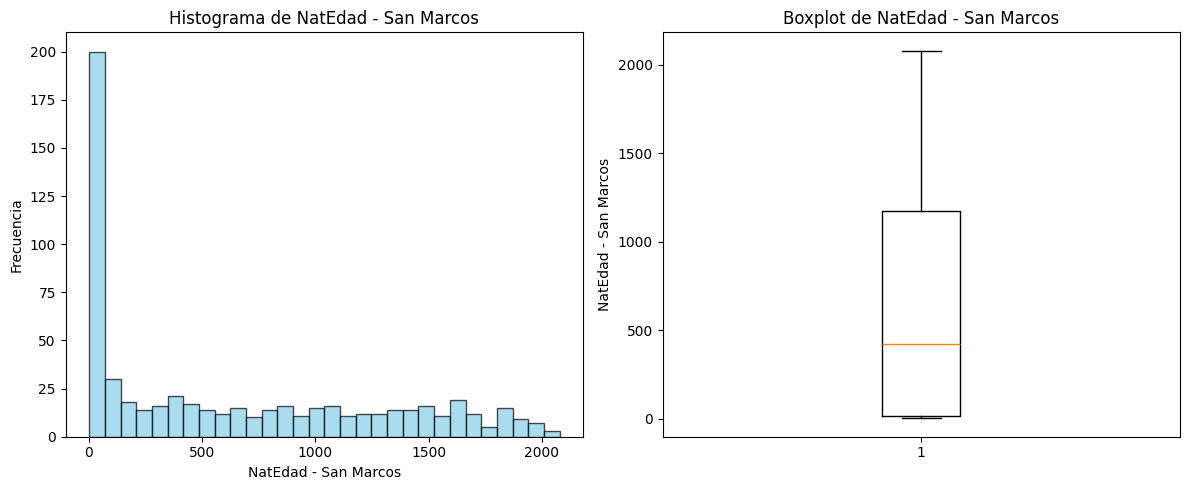

⚠️ La columna 'Huehuetenango' tiene 52 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.17336822086490949468
p-value = 0.00000000000000025528
Se rechaza la hipótesis nula: los datos de 'NatEdad - Huehuetenango' NO provienen de una distribución normal.



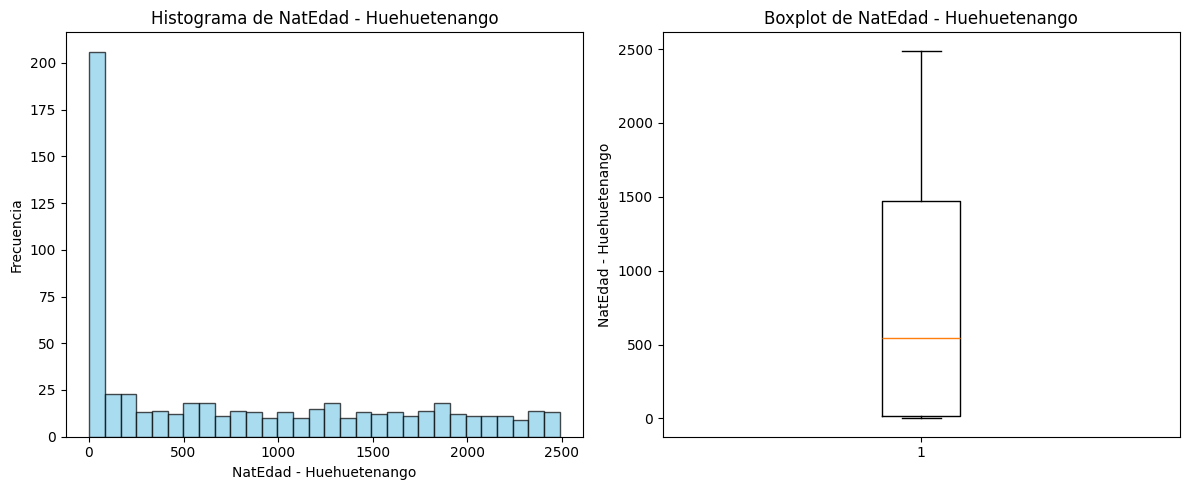

⚠️ La columna 'Quiché' tiene 66 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.16441114520454391812
p-value = 0.00000000000002213082
Se rechaza la hipótesis nula: los datos de 'NatEdad - Quiché' NO provienen de una distribución normal.



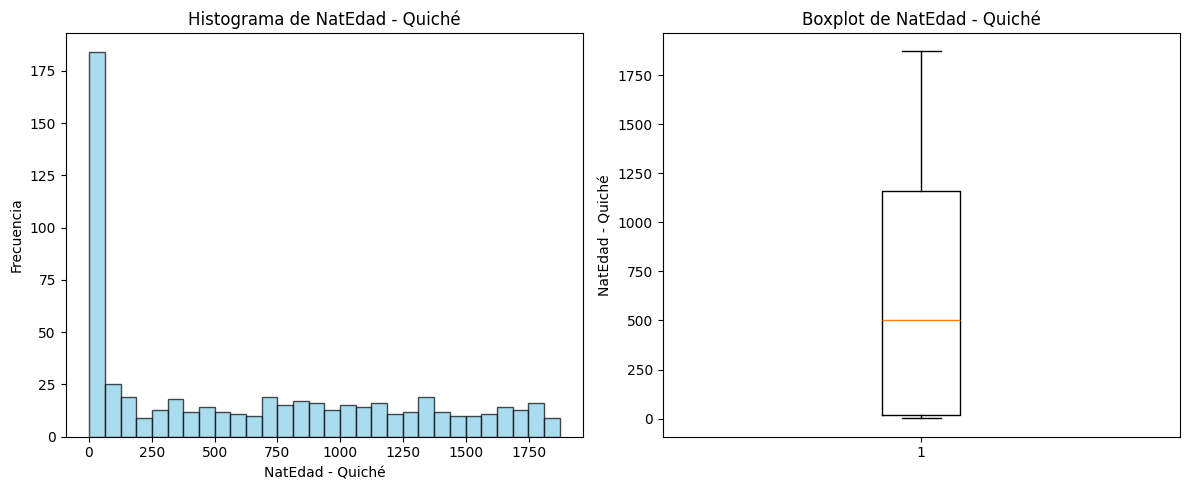

⚠️ La columna 'Baja Verapaz' tiene 141 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.12888945499791365501
p-value = 0.00000006643714230056
Se rechaza la hipótesis nula: los datos de 'NatEdad - Baja Verapaz' NO provienen de una distribución normal.



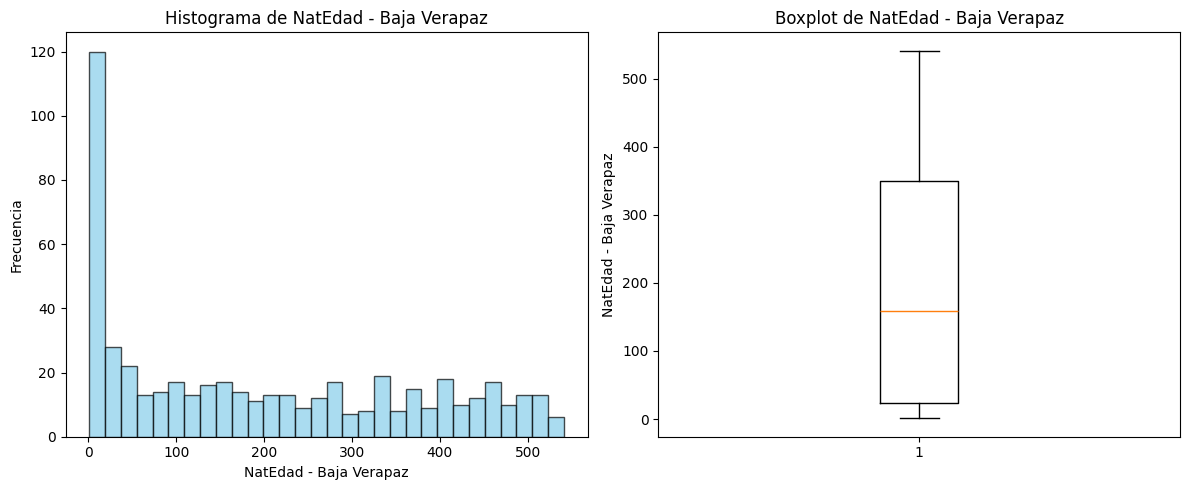

⚠️ La columna 'Alta Verapaz' tiene 79 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.15797682016516267911
p-value = 0.00000000000050540084
Se rechaza la hipótesis nula: los datos de 'NatEdad - Alta Verapaz' NO provienen de una distribución normal.



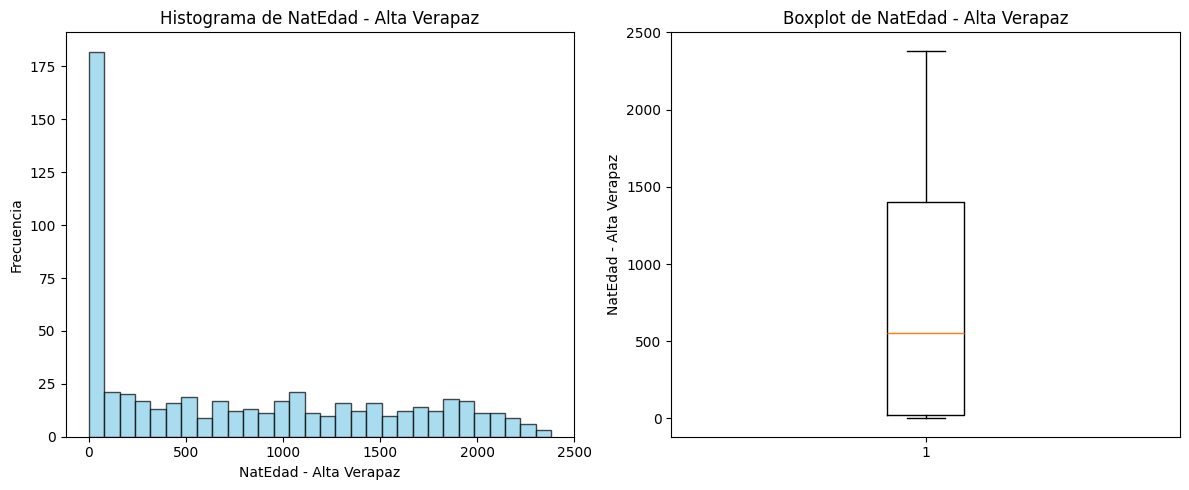

⚠️ La columna 'Petén' tiene 75 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.15854513473219472575
p-value = 0.00000000000033470000
Se rechaza la hipótesis nula: los datos de 'NatEdad - Petén' NO provienen de una distribución normal.



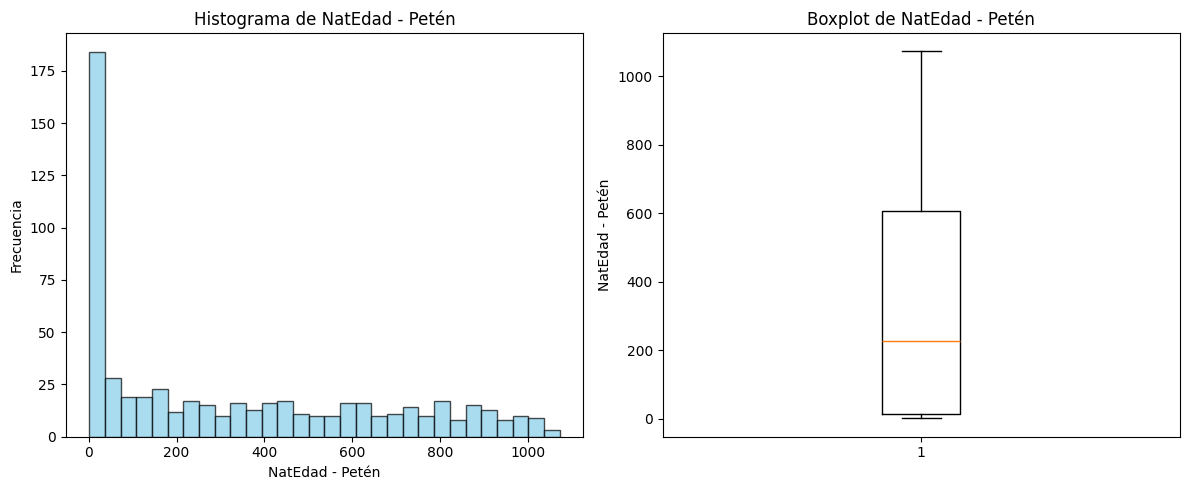

⚠️ La columna 'Izabal' tiene 116 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.15012673521700670154
p-value = 0.00000000004534791787
Se rechaza la hipótesis nula: los datos de 'NatEdad - Izabal' NO provienen de una distribución normal.



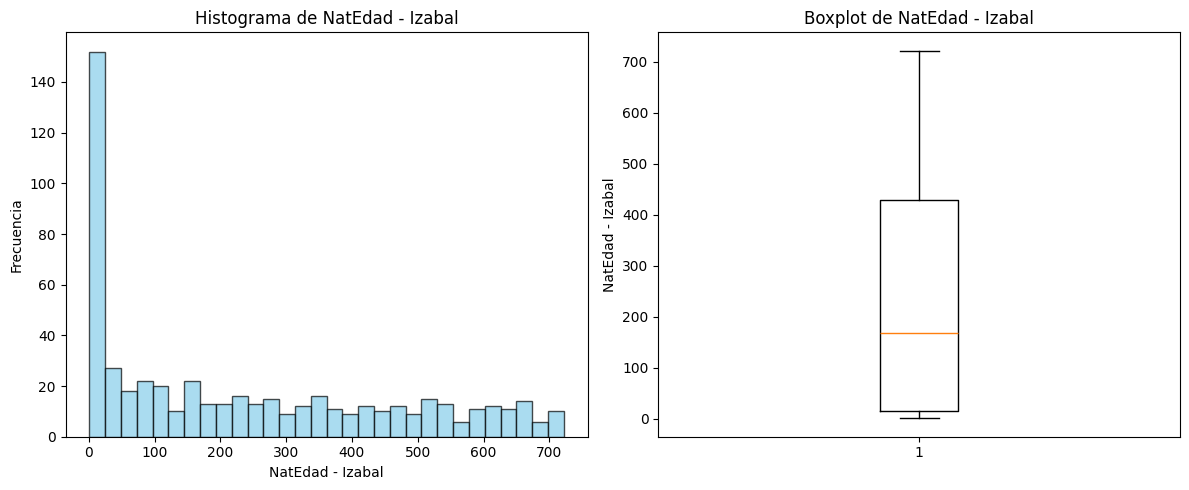

⚠️ La columna 'Zacapa' tiene 135 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13867135592003076994
p-value = 0.00000000347912348766
Se rechaza la hipótesis nula: los datos de 'NatEdad - Zacapa' NO provienen de una distribución normal.



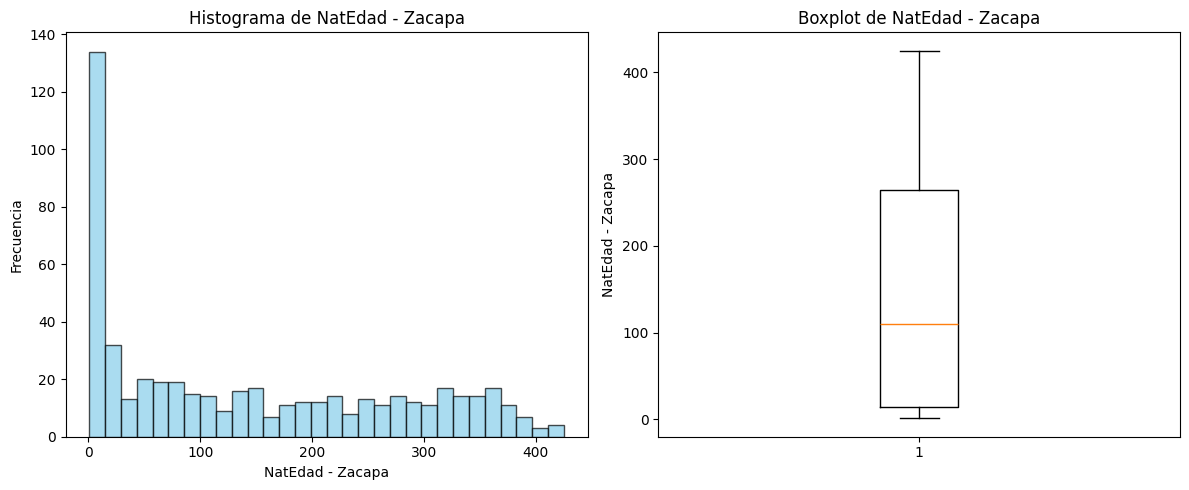

⚠️ La columna 'Chiquimula' tiene 116 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13902946548970351870
p-value = 0.00000000149864172567
Se rechaza la hipótesis nula: los datos de 'NatEdad - Chiquimula' NO provienen de una distribución normal.



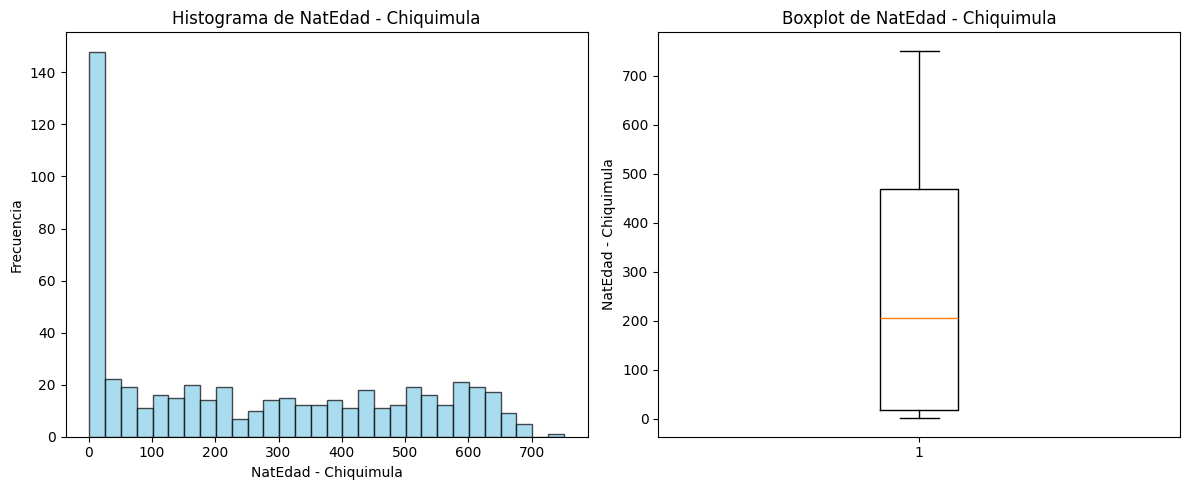

⚠️ La columna 'Jalapa' tiene 144 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.12597686022755605340
p-value = 0.00000015792804669263
Se rechaza la hipótesis nula: los datos de 'NatEdad - Jalapa' NO provienen de una distribución normal.



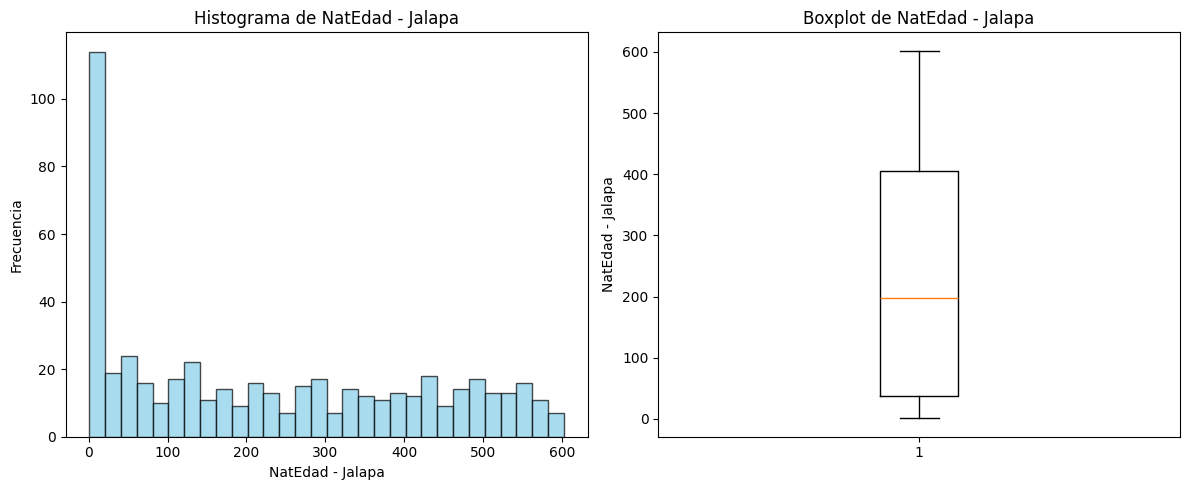

⚠️ La columna 'Jutiapa' tiene 118 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13884180898164999451
p-value = 0.00000000171395971779
Se rechaza la hipótesis nula: los datos de 'NatEdad - Jutiapa' NO provienen de una distribución normal.



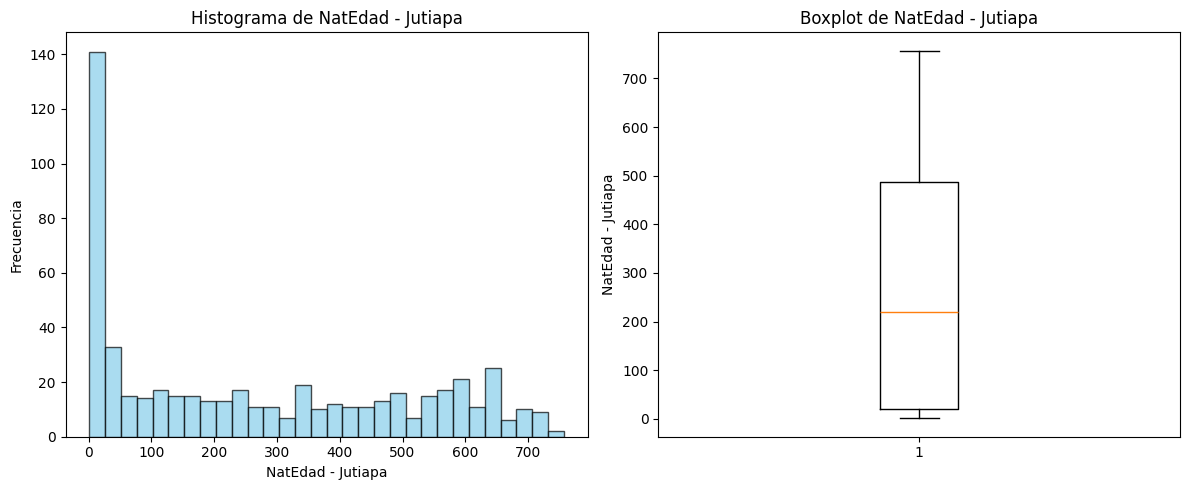

⚠️ La columna 'Extranjero' tiene 279 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.13028322617447918308
p-value = 0.00000503370349841134
Se rechaza la hipótesis nula: los datos de 'NatEdad - Extranjero' NO provienen de una distribución normal.



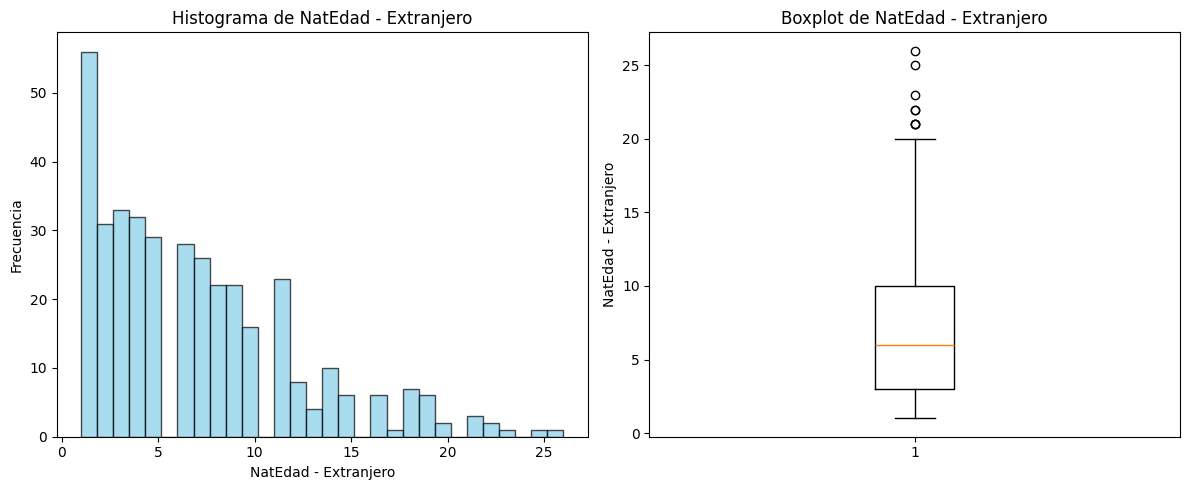

⚠️ La columna 'Ignorado' tiene 516 ceros en el archivo 'NatEdad'.
Estadístico de prueba (ks_statistic) = 0.41790556469280398799
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEdad - Ignorado' NO provienen de una distribución normal.



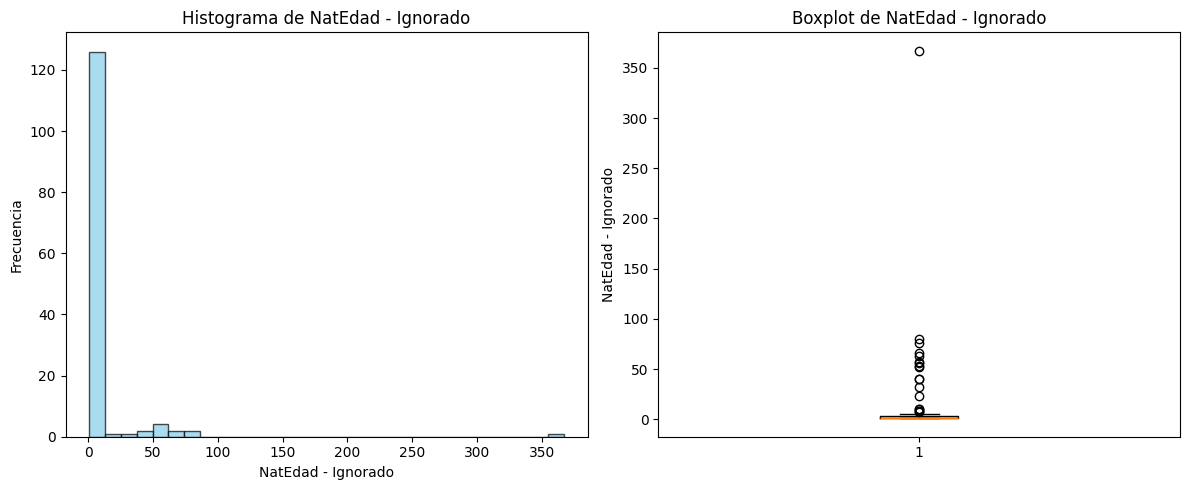

********************************************************************************************

🔹 **Analizando archivo: NatEdadEC**

Estadístico de prueba (ks_statistic) = 0.16904577698142064790
p-value = 0.00000057828177456297
Se rechaza la hipótesis nula: los datos de 'NatEdadEC - Total' NO provienen de una distribución normal.



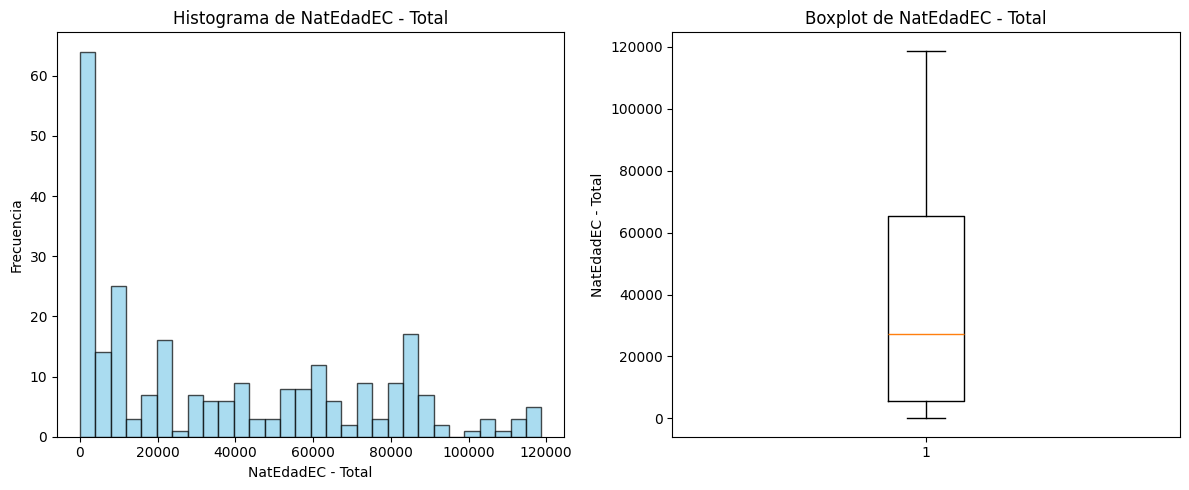

Estadístico de prueba (ks_statistic) = 0.19667780868030515506
p-value = 0.00000000274570254387
Se rechaza la hipótesis nula: los datos de 'NatEdadEC - Soltero(a)' NO provienen de una distribución normal.



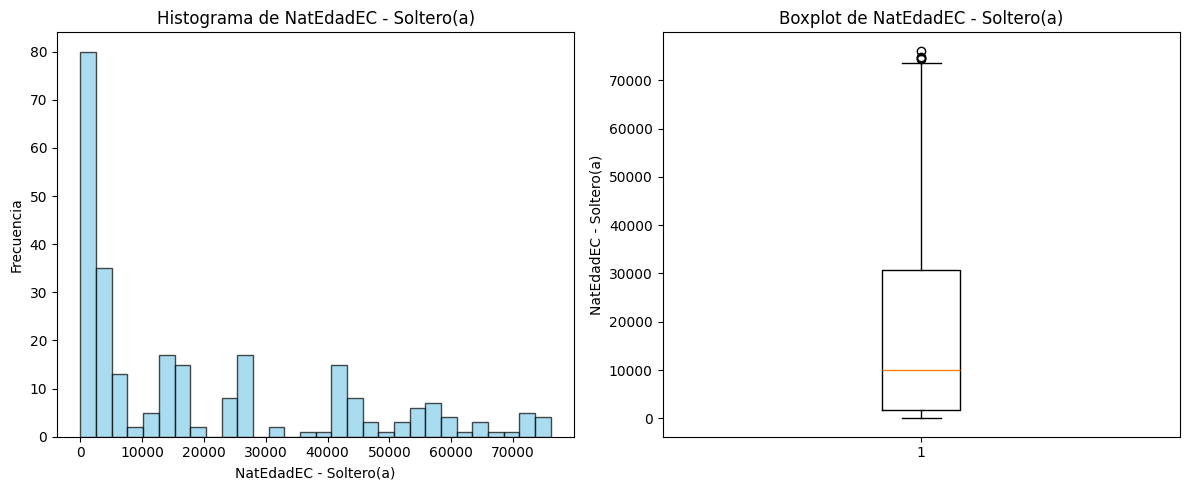

⚠️ La columna 'Casado(a)' tiene 17 ceros en el archivo 'NatEdadEC'.
Estadístico de prueba (ks_statistic) = 0.20217995479533229508
p-value = 0.00000000348320963512
Se rechaza la hipótesis nula: los datos de 'NatEdadEC - Casado(a)' NO provienen de una distribución normal.



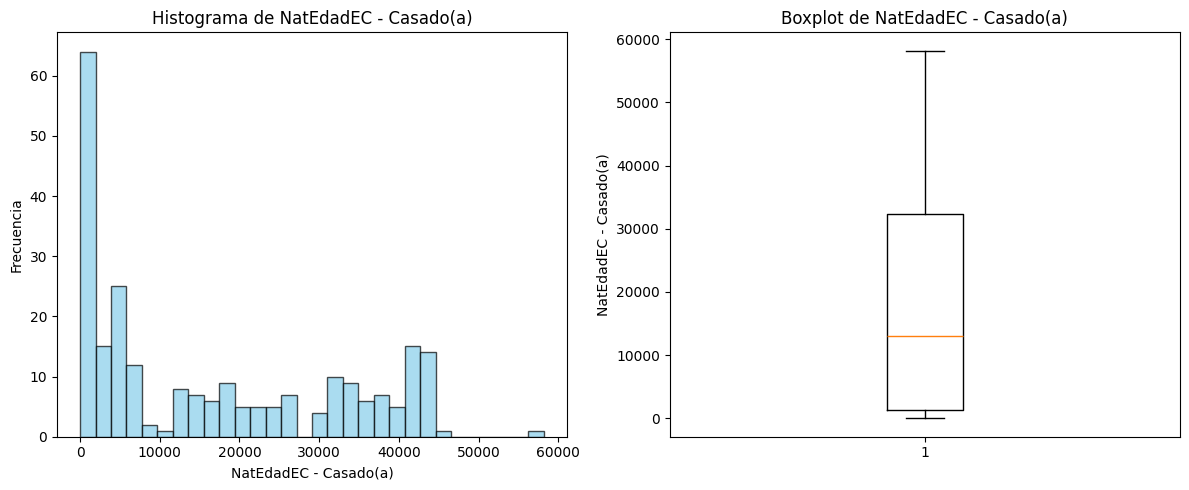

⚠️ La columna 'Unido(a)' tiene 50 ceros en el archivo 'NatEdadEC'.
Estadístico de prueba (ks_statistic) = 0.15685926720059278905
p-value = 0.00005587592857962244
Se rechaza la hipótesis nula: los datos de 'NatEdadEC - Unido(a)' NO provienen de una distribución normal.



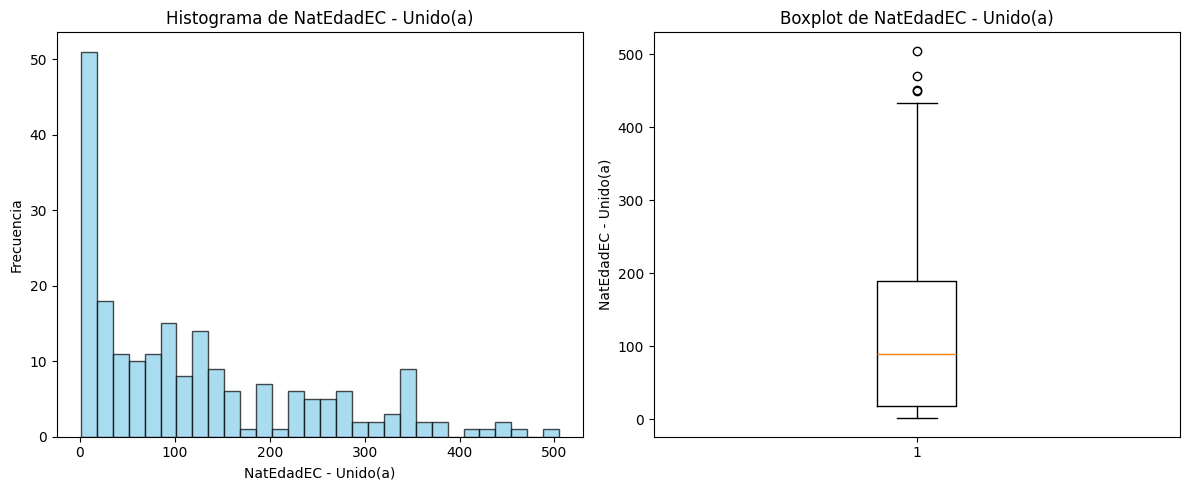

⚠️ La columna 'Ignorado' tiene 43 ceros en el archivo 'NatEdadEC'.
Estadístico de prueba (ks_statistic) = 0.53479663101302477024
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatEdadEC - Ignorado' NO provienen de una distribución normal.



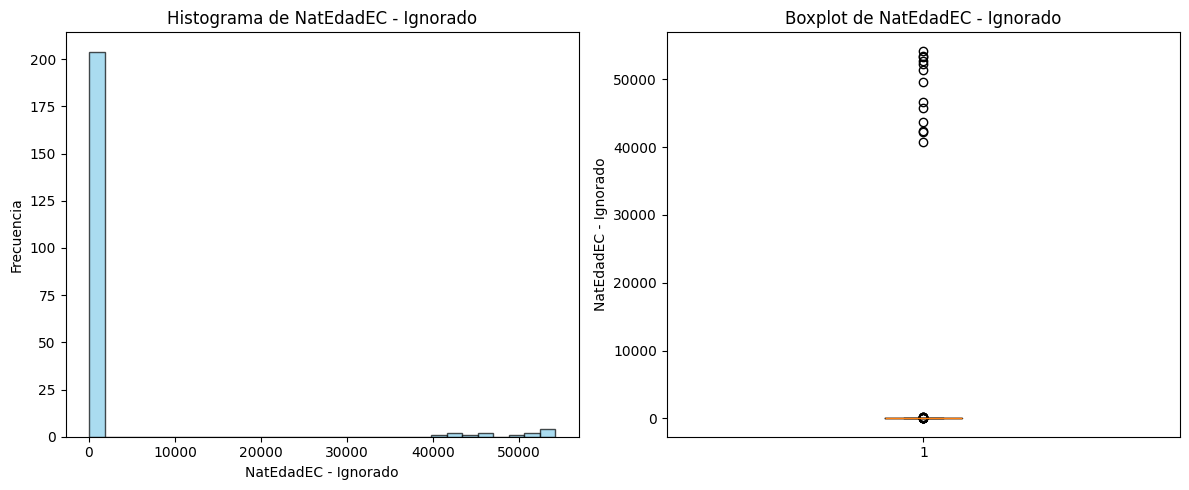

********************************************************************************************

🔹 **Analizando archivo: NatEscolaridad**

Estadístico de prueba (ks_statistic) = 0.29067512055991528985
p-value = 0.00000000000000005869
Se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Total' NO provienen de una distribución normal.



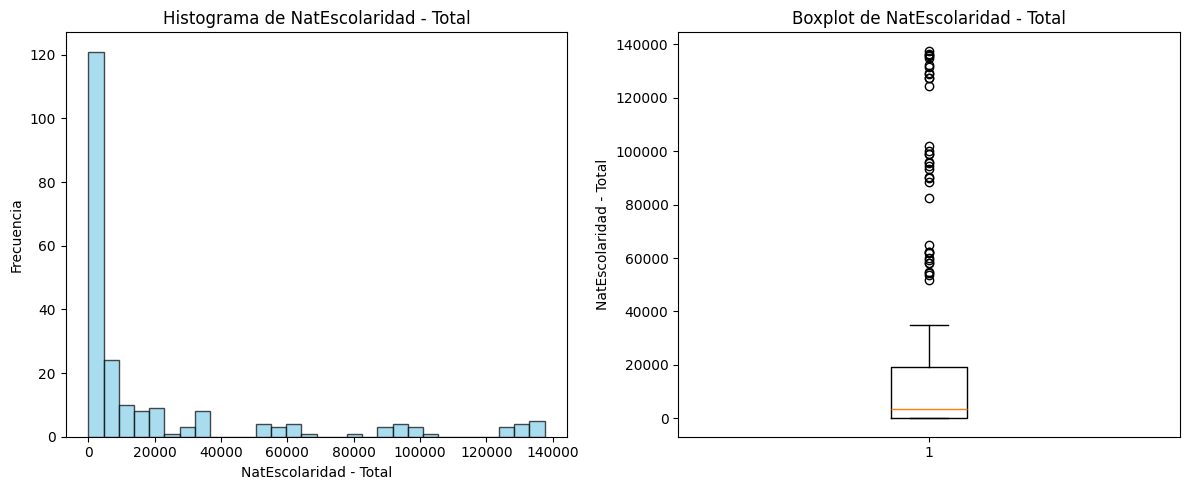

Estadístico de prueba (ks_statistic) = 0.22225351437585466607
p-value = 0.00000000050107539801
Se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Ninguno' NO provienen de una distribución normal.



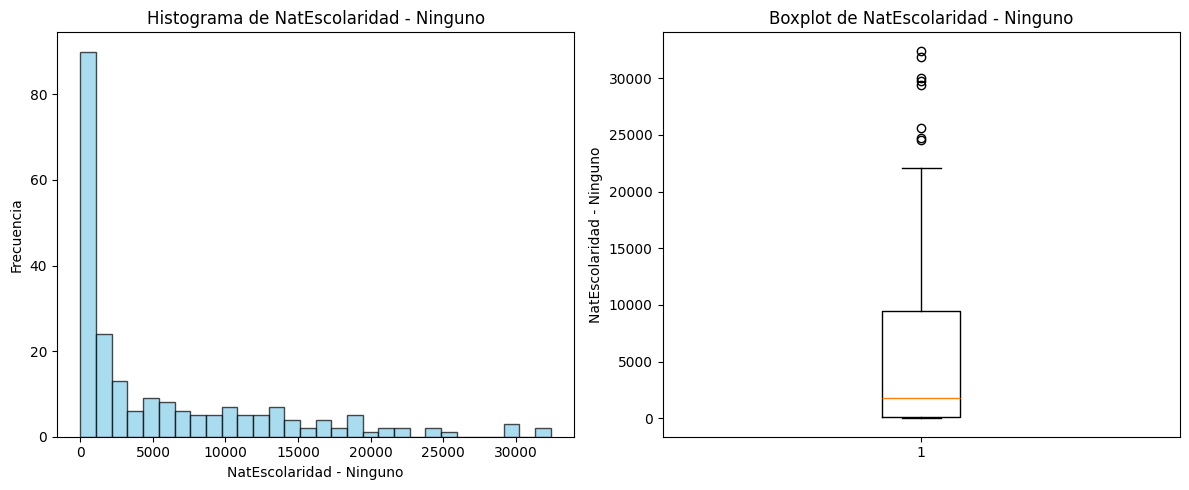

⚠️ La columna 'Primaria' tiene 8 ceros en el archivo 'NatEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.30810652237016866728
p-value = 0.00000000000000000229
Se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Primaria' NO provienen de una distribución normal.



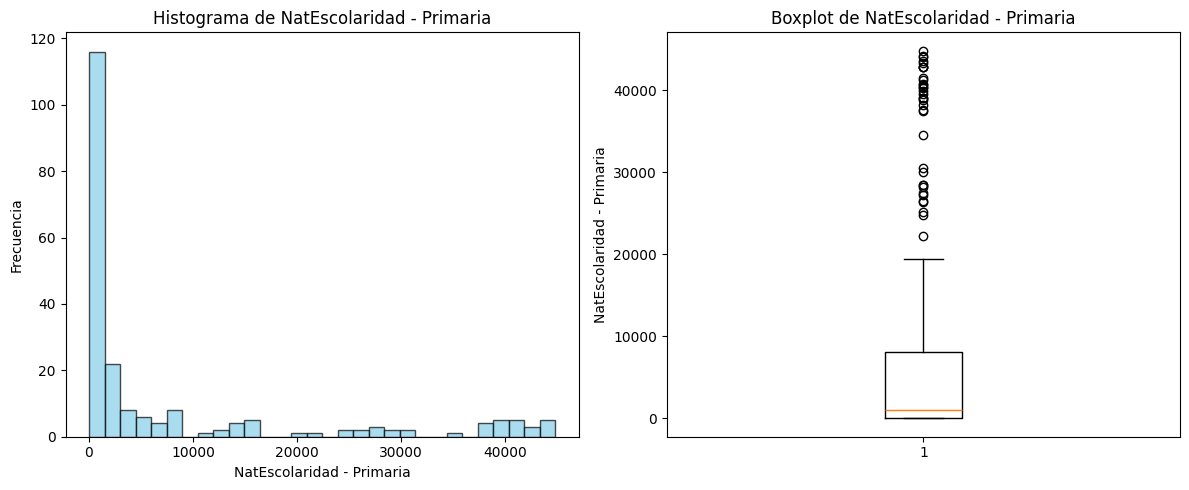

⚠️ La columna 'Básica' tiene 60 ceros en el archivo 'NatEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.33540133487261925005
p-value = 0.00000000000000014917
Se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Básica' NO provienen de una distribución normal.



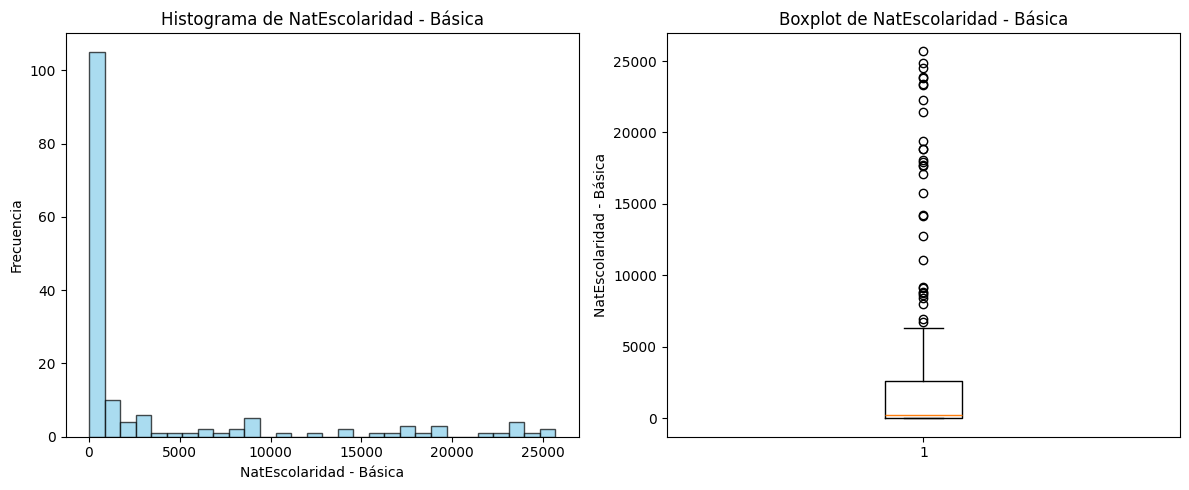

⚠️ La columna 'Diversificado' tiene 82 ceros en el archivo 'NatEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.35423584583413131321
p-value = 0.00000000000000053616
Se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Diversificado' NO provienen de una distribución normal.



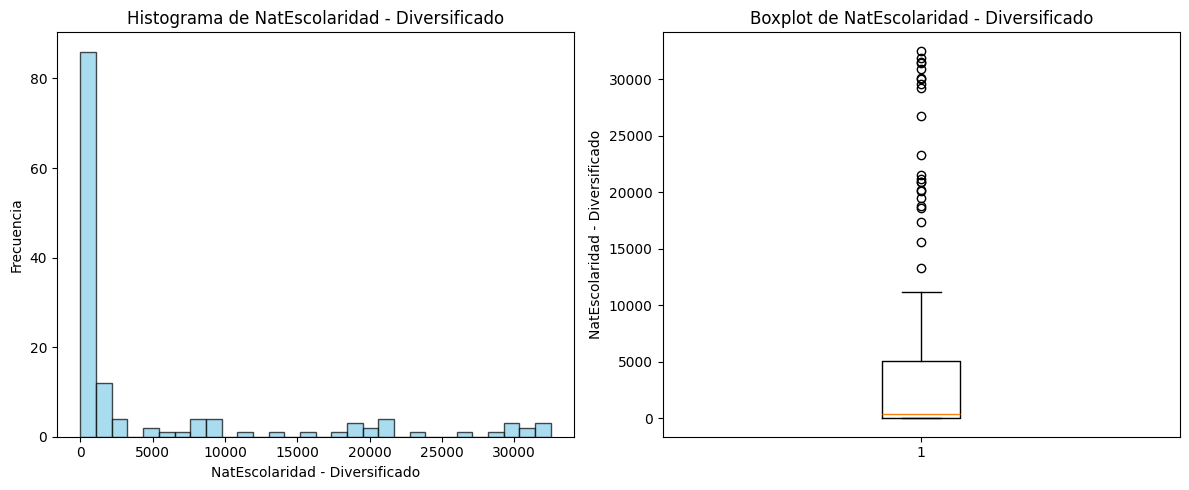

⚠️ La columna 'Universitario' tiene 119 ceros en el archivo 'NatEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.32838398754195052831
p-value = 0.00000000033420347127
Se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Universitario' NO provienen de una distribución normal.



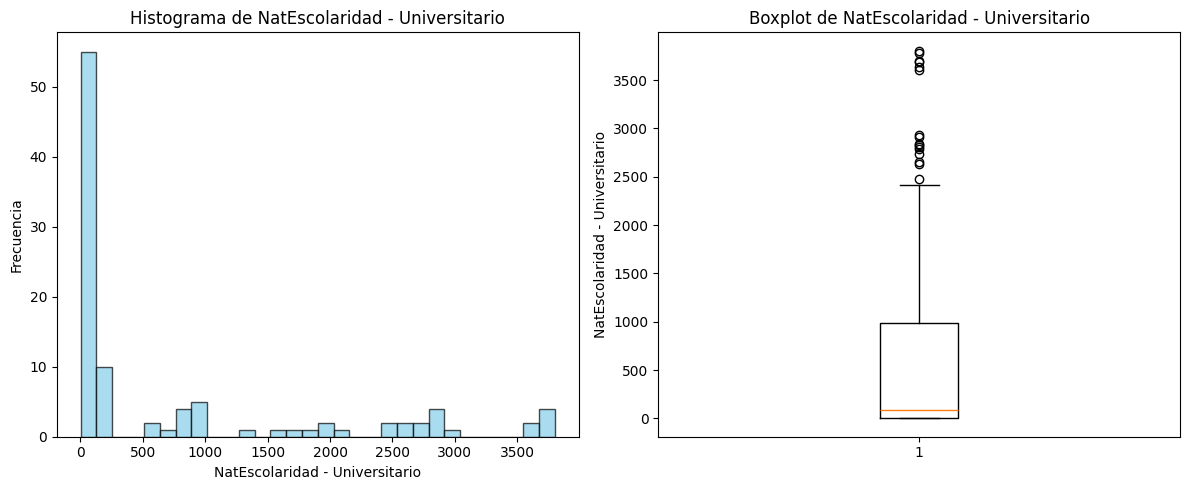

⚠️ La columna 'Post Grado' tiene 92 ceros en el archivo 'NatEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.20103112262863426229
p-value = 0.10240913947133145623
No se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Post Grado' parecen provenir de una distribución normal.



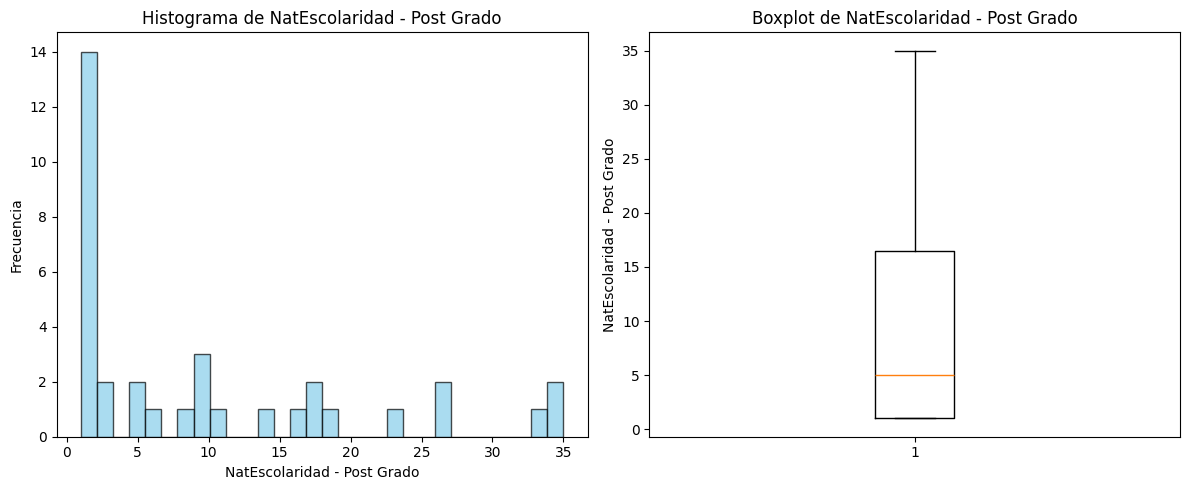

⚠️ La columna 'Doctorado' tiene 95 ceros en el archivo 'NatEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.29222387718394743361
p-value = 0.14893046981675839291
No se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Doctorado' parecen provenir de una distribución normal.



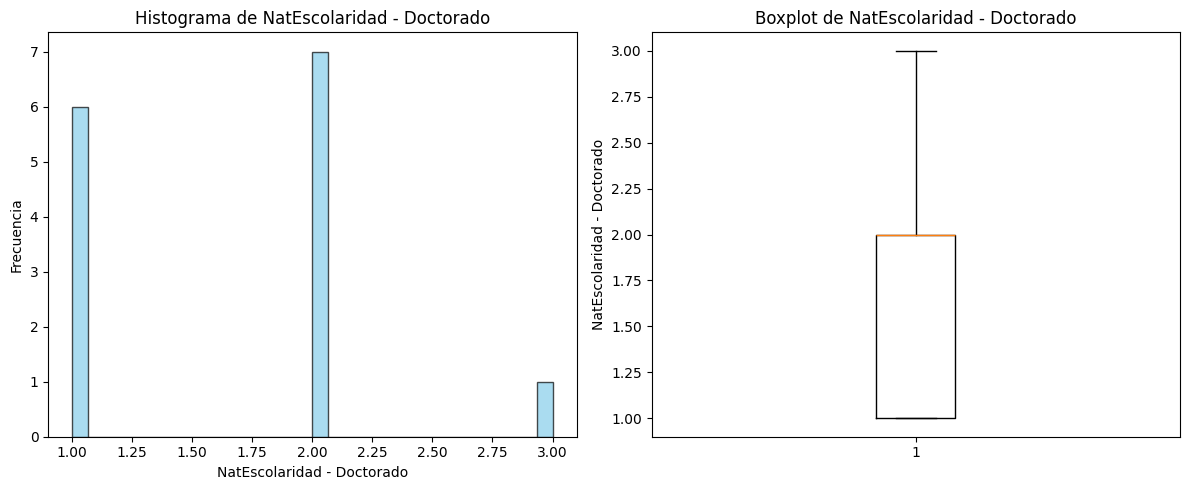

⚠️ La columna 'Ignorado' tiene 41 ceros en el archivo 'NatEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.35161602032204680723
p-value = 0.00000000000000000003
Se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Ignorado' NO provienen de una distribución normal.



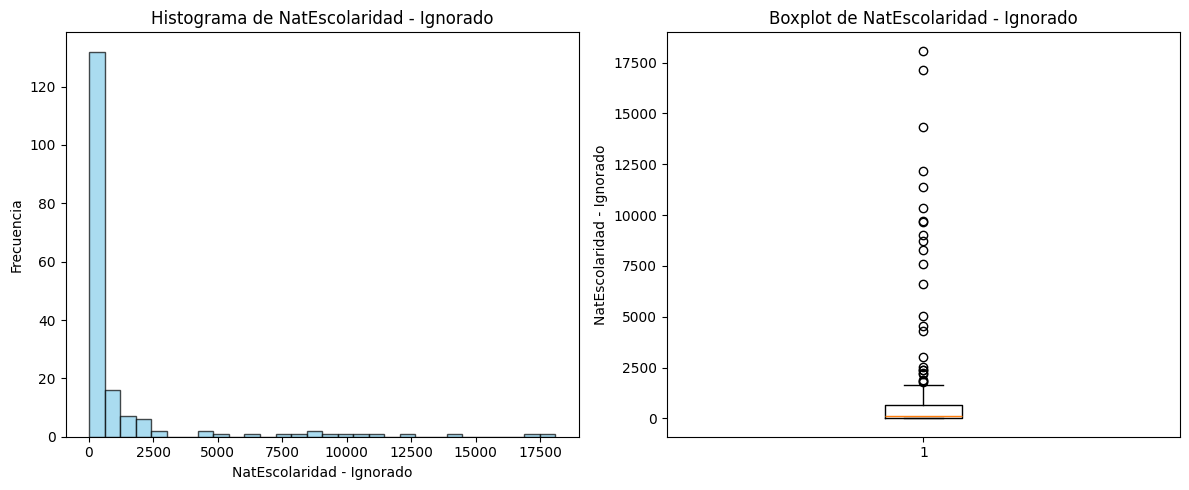

⚠️ La columna 'Post grado' tiene 65 ceros en el archivo 'NatEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.31311891109898848384
p-value = 0.00614649540729428345
Se rechaza la hipótesis nula: los datos de 'NatEscolaridad - Post grado' NO provienen de una distribución normal.



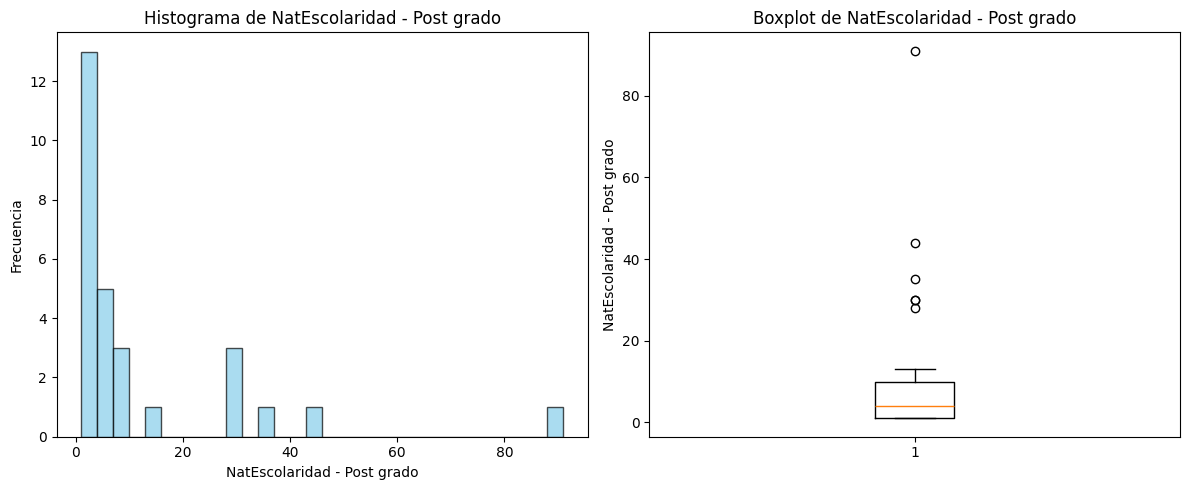

********************************************************************************************

🔹 **Analizando archivo: NatNum**

Estadístico de prueba (ks_statistic) = 0.19937147327842347222
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatNum - Total' NO provienen de una distribución normal.



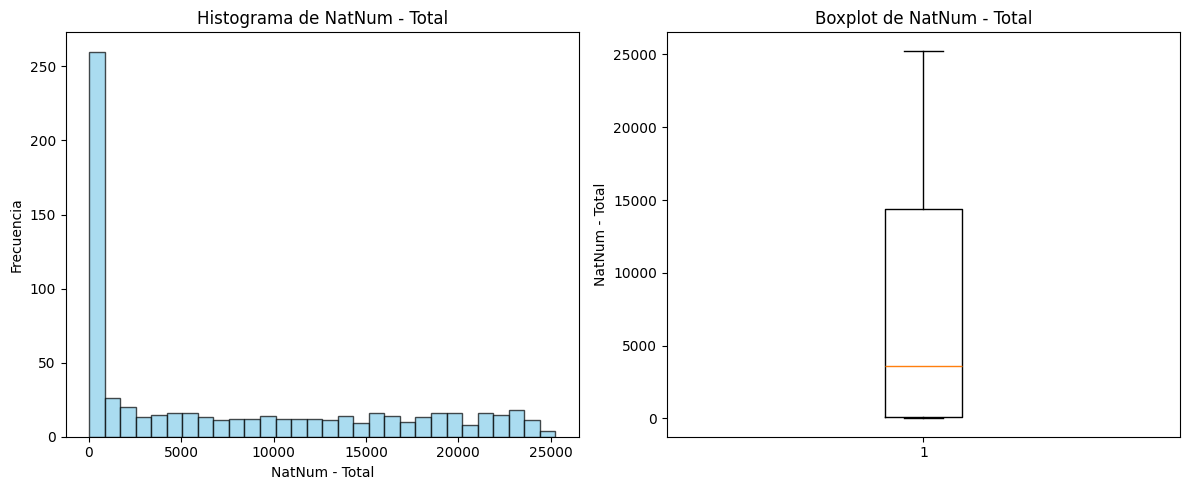

⚠️ La columna '1' tiene 51 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.25167139833278207028
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatNum - 1' NO provienen de una distribución normal.



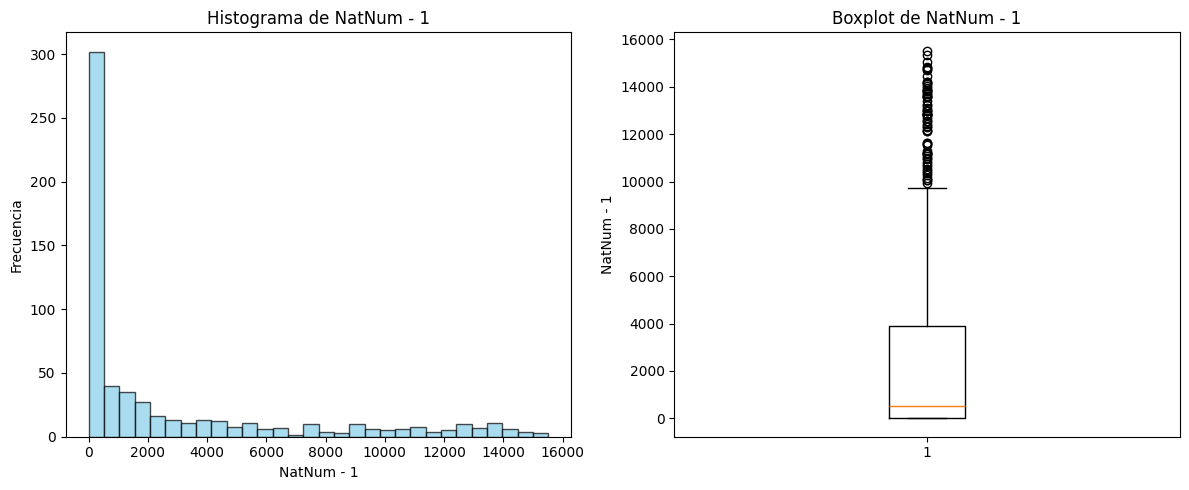

⚠️ La columna '2' tiene 94 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.22042036843984547101
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatNum - 2' NO provienen de una distribución normal.



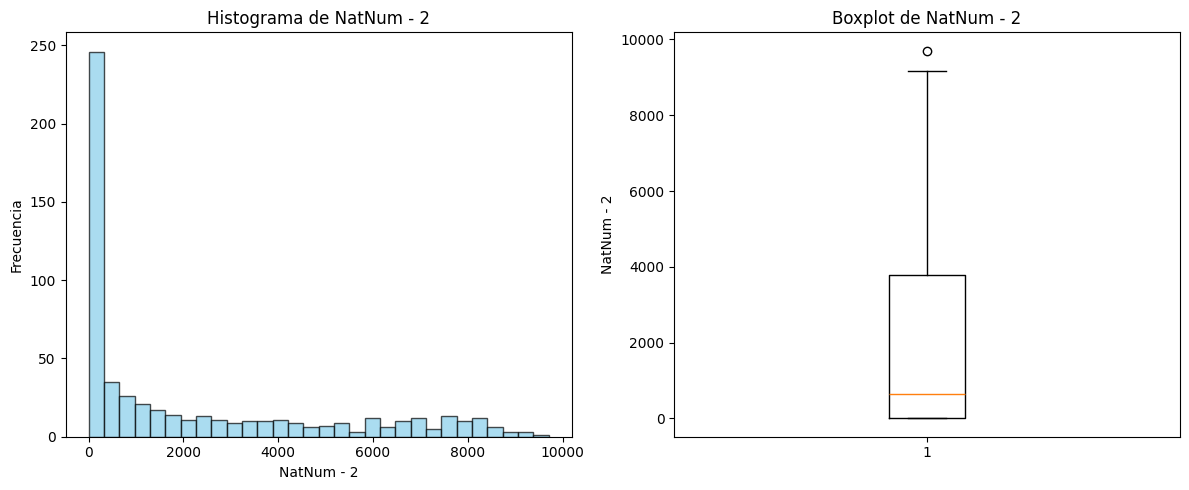

⚠️ La columna '3' tiene 130 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.20700446373700298608
p-value = 0.00000000000000000003
Se rechaza la hipótesis nula: los datos de 'NatNum - 3' NO provienen de una distribución normal.



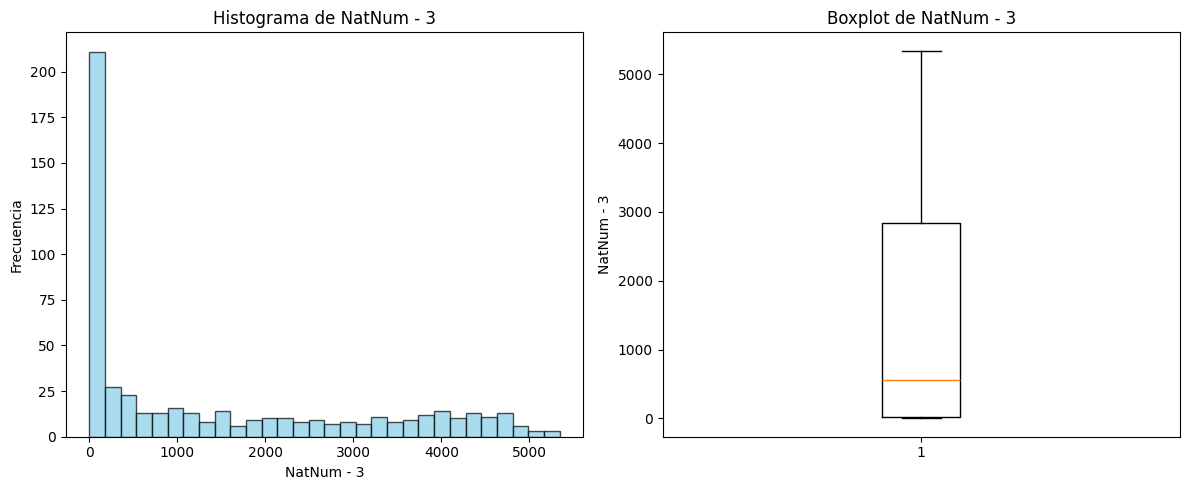

⚠️ La columna '4' tiene 149 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.20176473861897520345
p-value = 0.00000000000000000156
Se rechaza la hipótesis nula: los datos de 'NatNum - 4' NO provienen de una distribución normal.



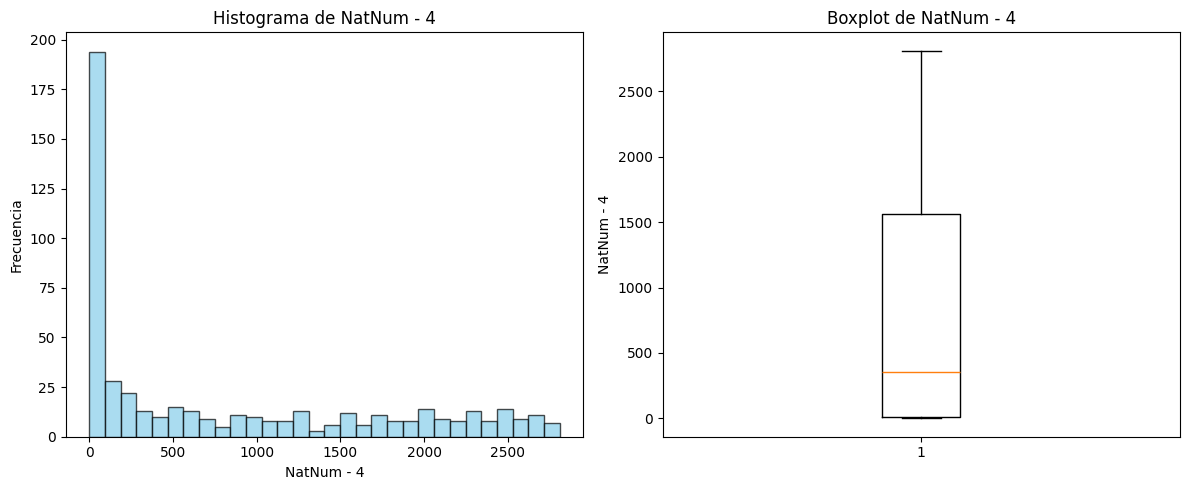

⚠️ La columna '5' tiene 167 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.19985039099304008348
p-value = 0.00000000000000001470
Se rechaza la hipótesis nula: los datos de 'NatNum - 5' NO provienen de una distribución normal.



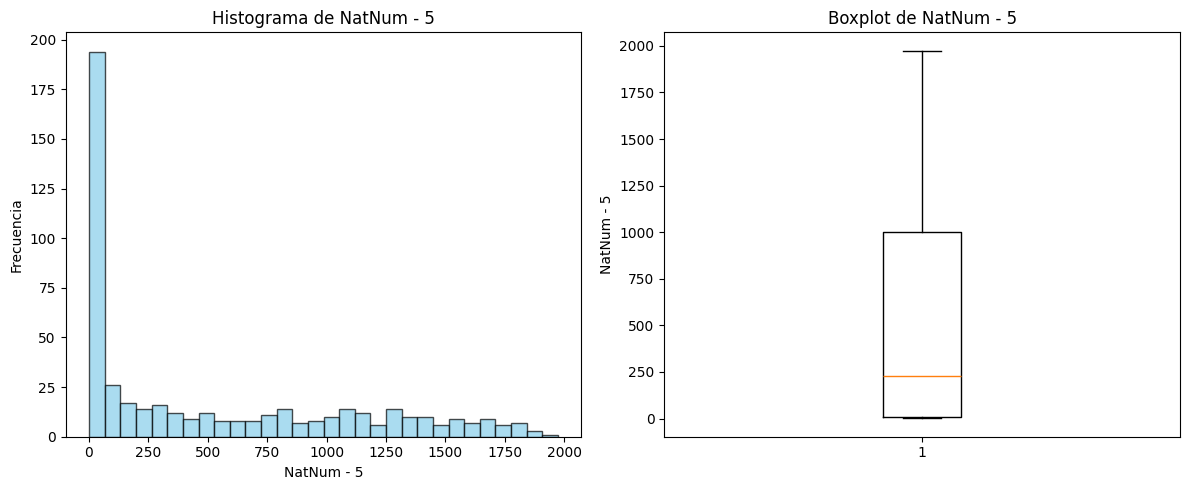

⚠️ La columna '6' tiene 187 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.19863540966156517653
p-value = 0.00000000000000011697
Se rechaza la hipótesis nula: los datos de 'NatNum - 6' NO provienen de una distribución normal.



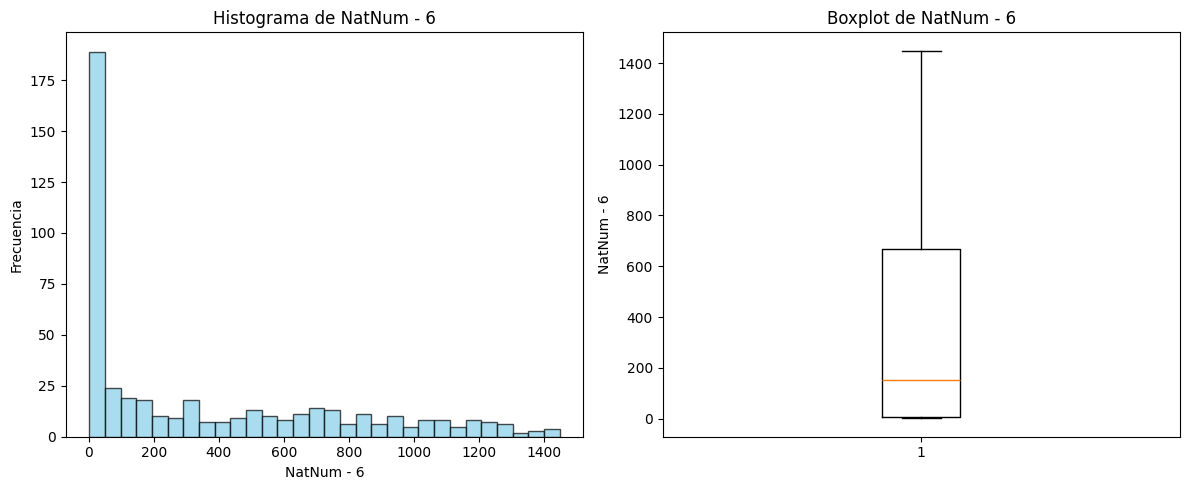

⚠️ La columna '7' tiene 205 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.21065001130393501416
p-value = 0.00000000000000000536
Se rechaza la hipótesis nula: los datos de 'NatNum - 7' NO provienen de una distribución normal.



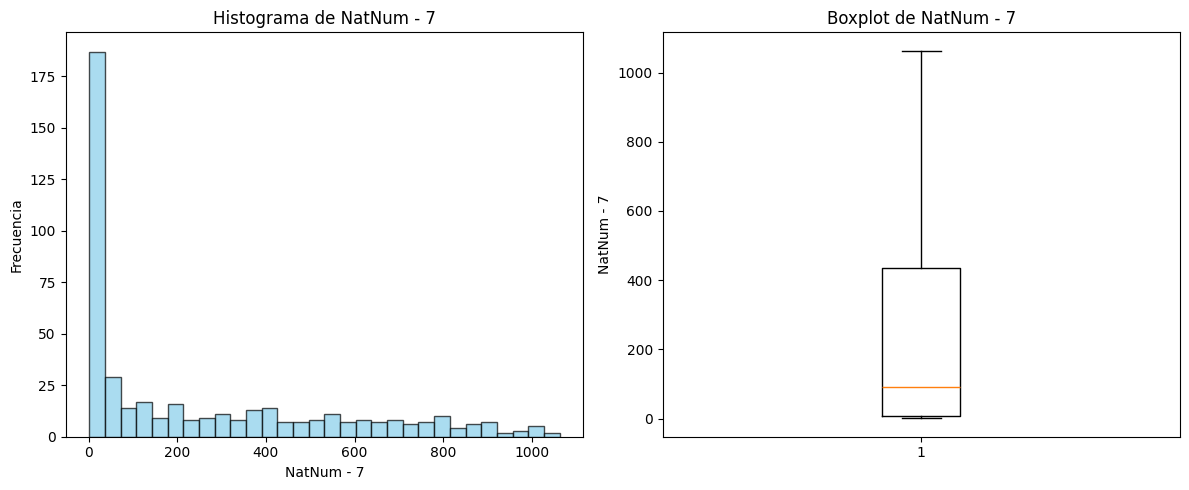

⚠️ La columna '8' tiene 231 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.21878651201460613818
p-value = 0.00000000000000000266
Se rechaza la hipótesis nula: los datos de 'NatNum - 8' NO provienen de una distribución normal.



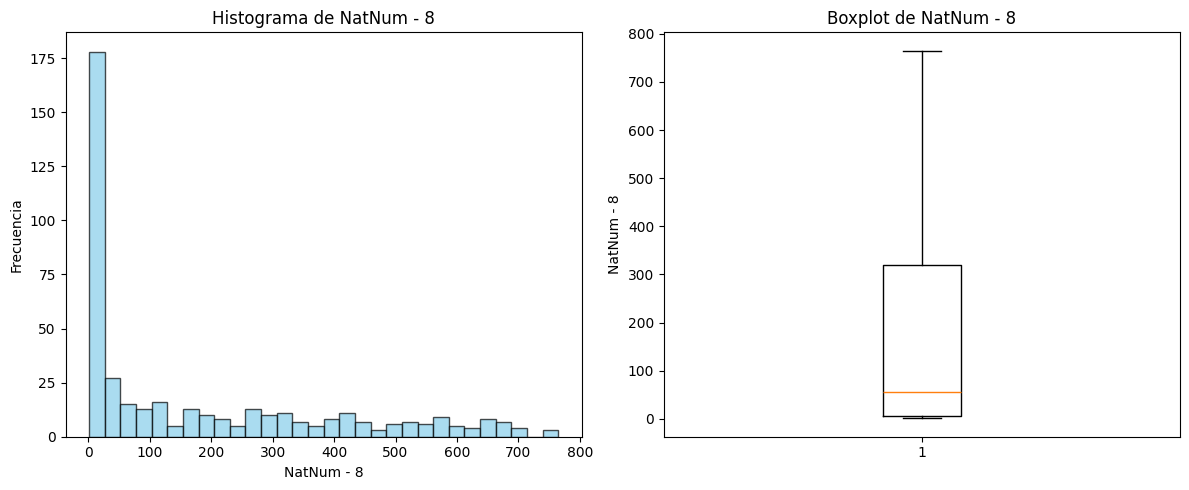

⚠️ La columna '9' tiene 265 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.20549283225645736950
p-value = 0.00000000000000641622
Se rechaza la hipótesis nula: los datos de 'NatNum - 9' NO provienen de una distribución normal.



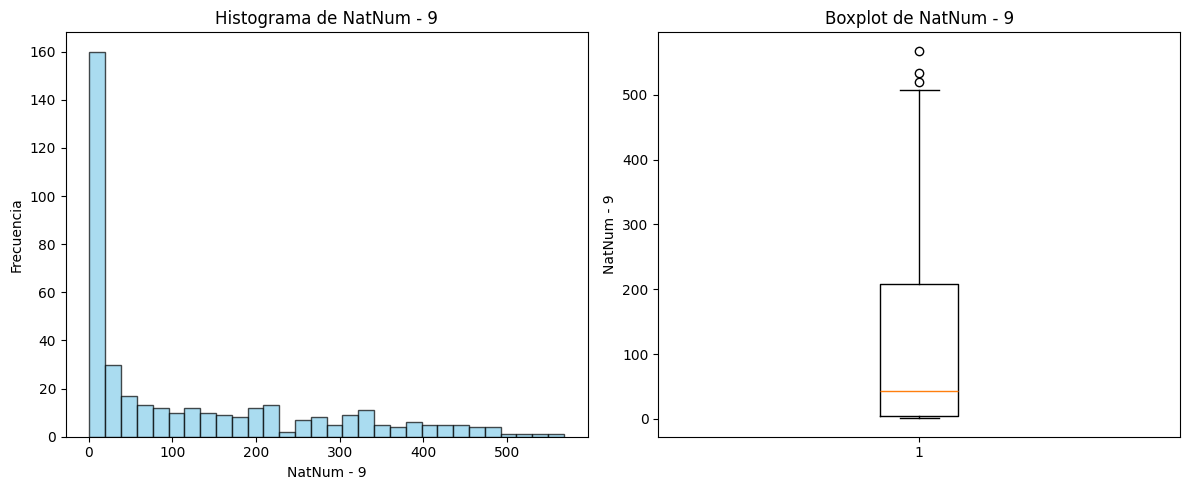

⚠️ La columna '10 y más' tiene 255 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.22892903180015378162
p-value = 0.00000000000000000066
Se rechaza la hipótesis nula: los datos de 'NatNum - 10 y más' NO provienen de una distribución normal.



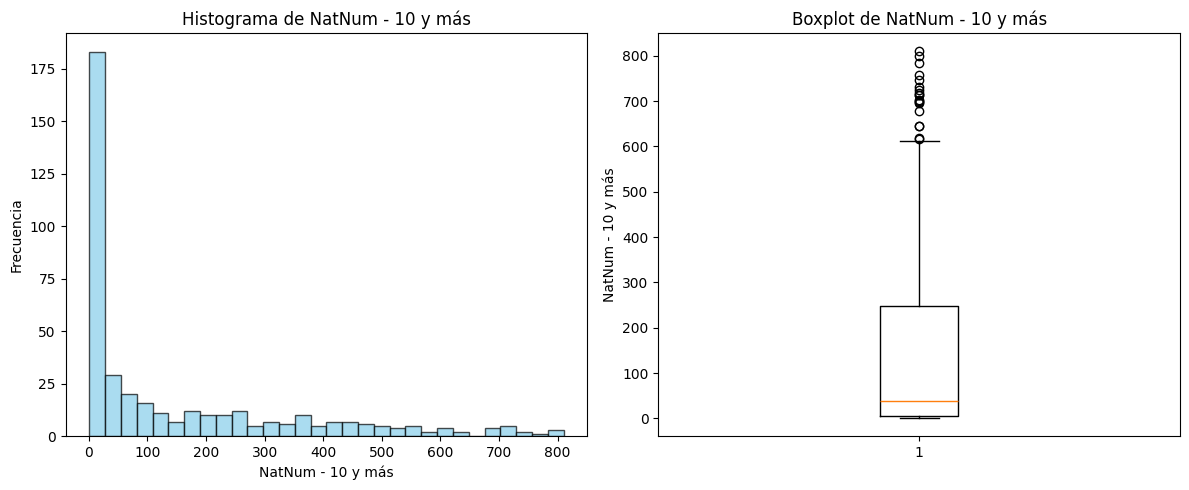

⚠️ La columna 'Ignorado' tiene 177 ceros en el archivo 'NatNum'.
Estadístico de prueba (ks_statistic) = 0.17509166287377647686
p-value = 0.00000000000027500255
Se rechaza la hipótesis nula: los datos de 'NatNum - Ignorado' NO provienen de una distribución normal.



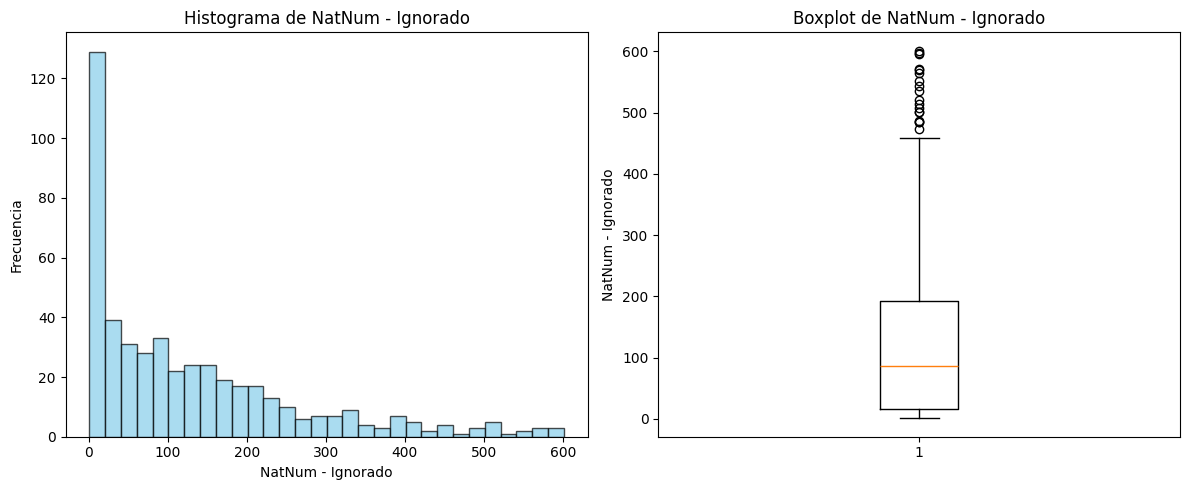

********************************************************************************************

🔹 **Analizando archivo: NatOcup**

⚠️ La columna 'Total' tiene 1 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.46901716406518589864
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatOcup - Total' NO provienen de una distribución normal.



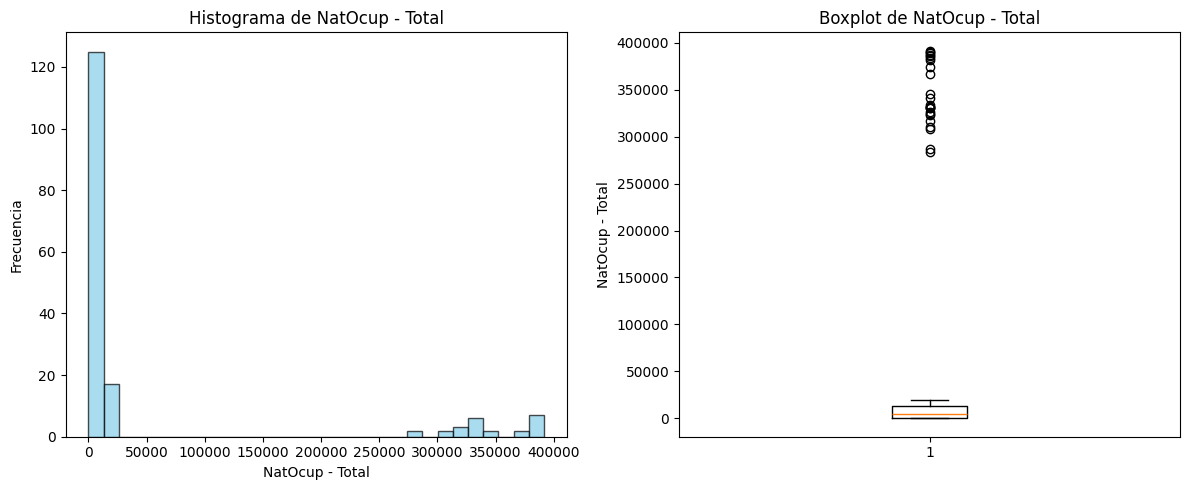

⚠️ La columna 'Menos de 15' tiene 84 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.29553420653388773331
p-value = 0.00000063983145471371
Se rechaza la hipótesis nula: los datos de 'NatOcup - Menos de 15' NO provienen de una distribución normal.



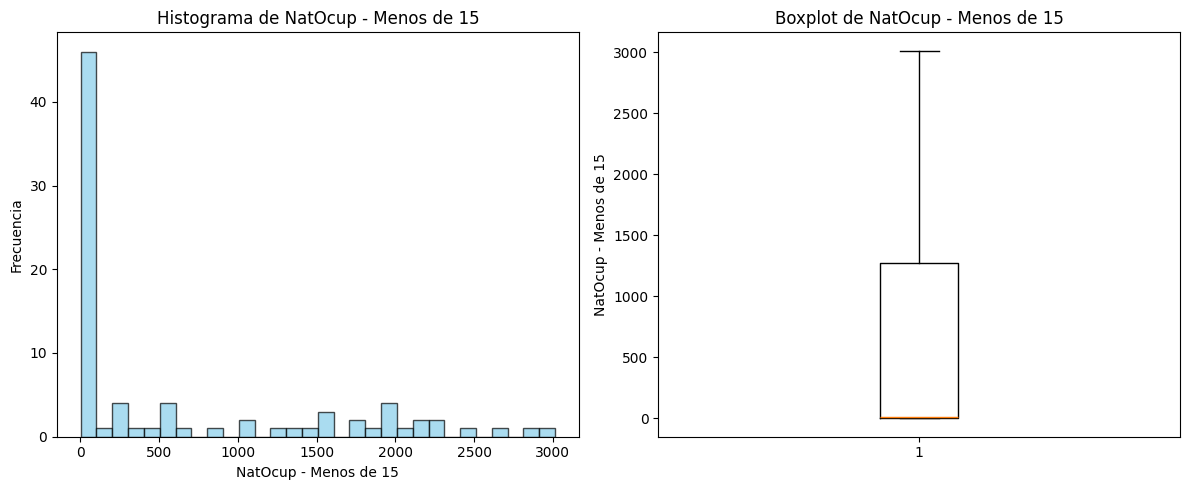

⚠️ La columna '15 - 19' tiene 22 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.41047044523079317946
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatOcup - 15 - 19' NO provienen de una distribución normal.



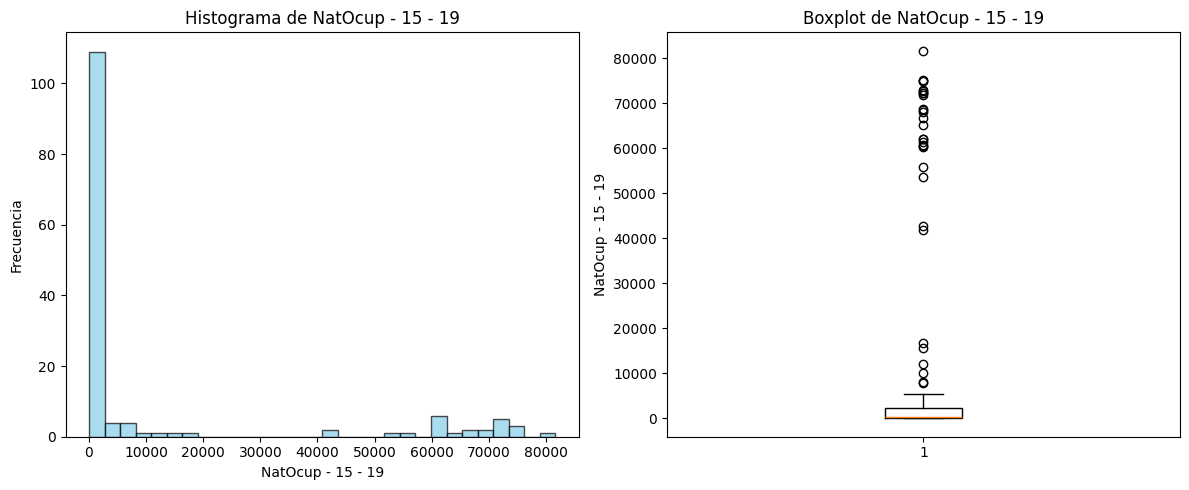

⚠️ La columna '20 - 24' tiene 3 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.48078273486943523540
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatOcup - 20 - 24' NO provienen de una distribución normal.



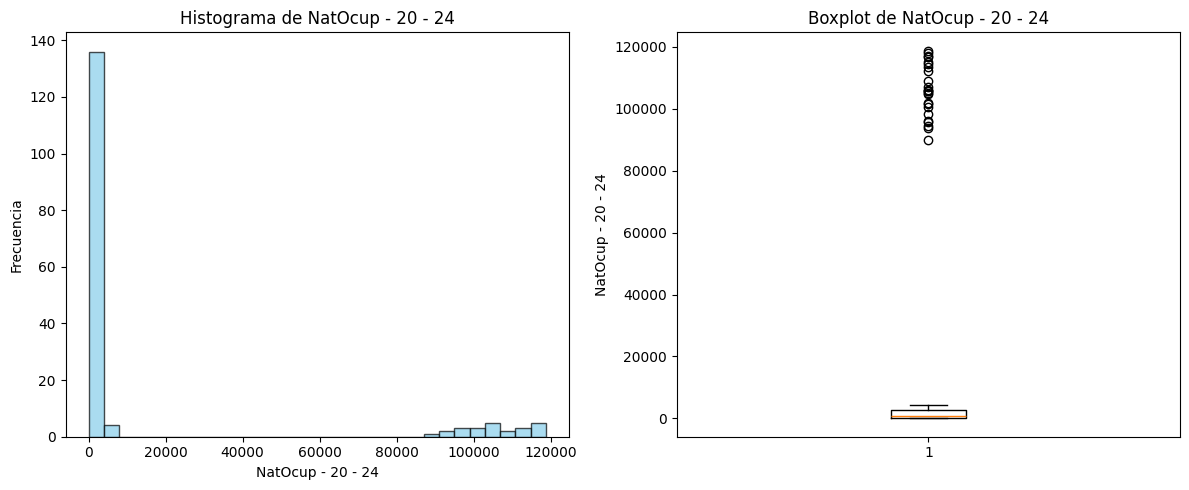

⚠️ La columna '25 - 29' tiene 2 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.43966915840444975583
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatOcup - 25 - 29' NO provienen de una distribución normal.



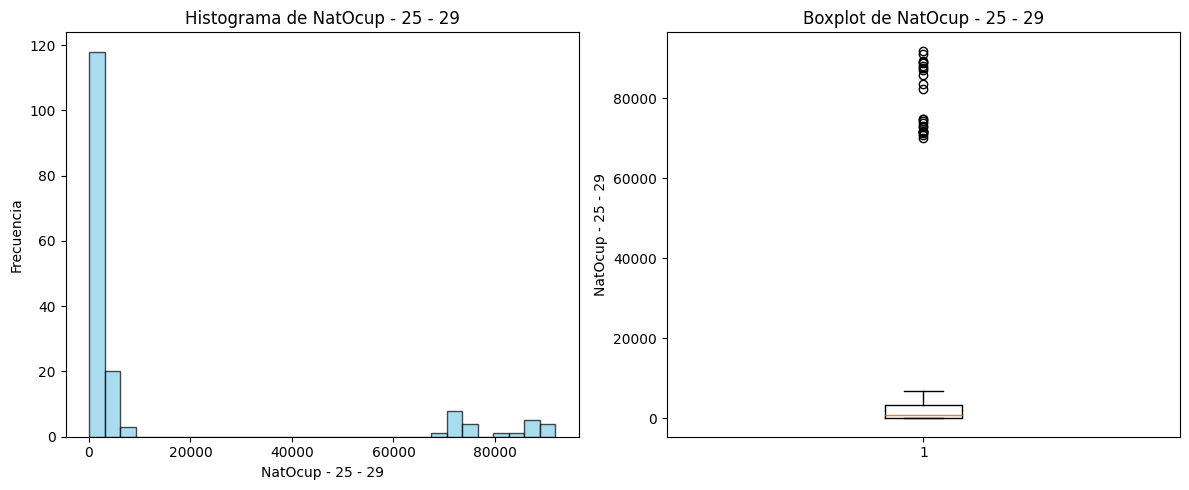

⚠️ La columna '30 - 34' tiene 5 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.42651382971566120794
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatOcup - 30 - 34' NO provienen de una distribución normal.



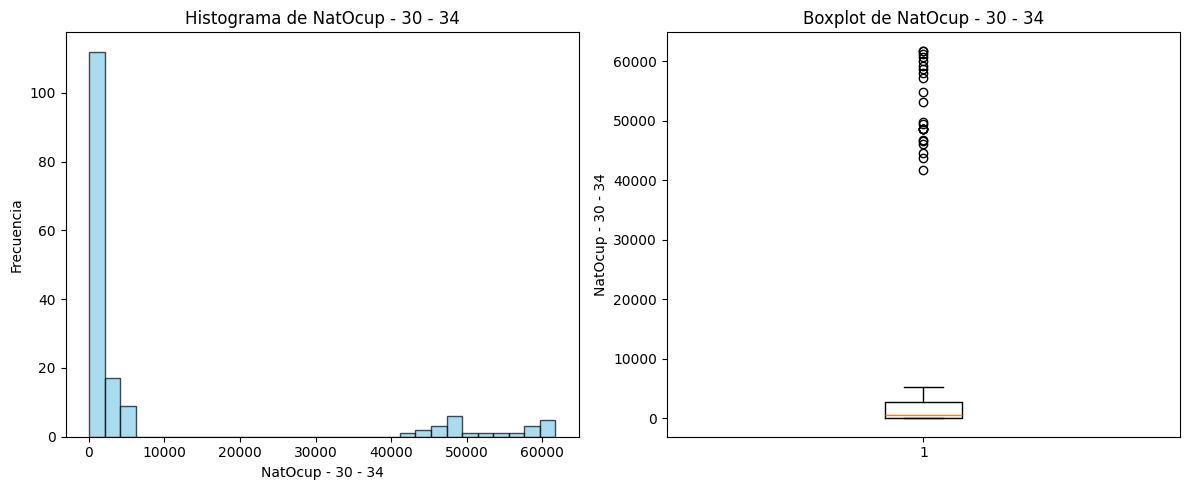

⚠️ La columna '35 - 39' tiene 6 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.43395628527000063013
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatOcup - 35 - 39' NO provienen de una distribución normal.



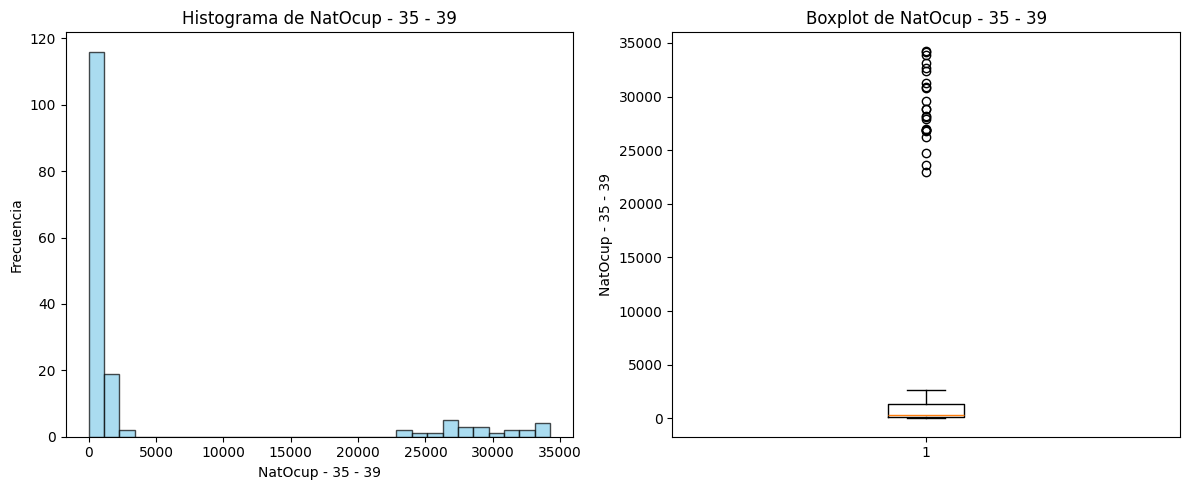

⚠️ La columna '40 - 44' tiene 13 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.46610599949068670655
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatOcup - 40 - 44' NO provienen de una distribución normal.



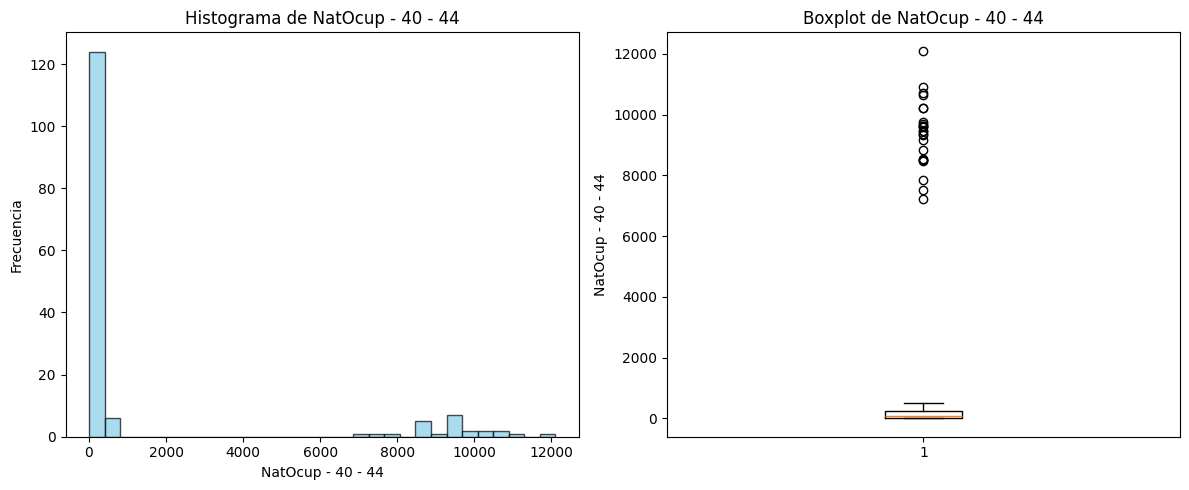

⚠️ La columna '45 - 49' tiene 30 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.46741760192100190174
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'NatOcup - 45 - 49' NO provienen de una distribución normal.



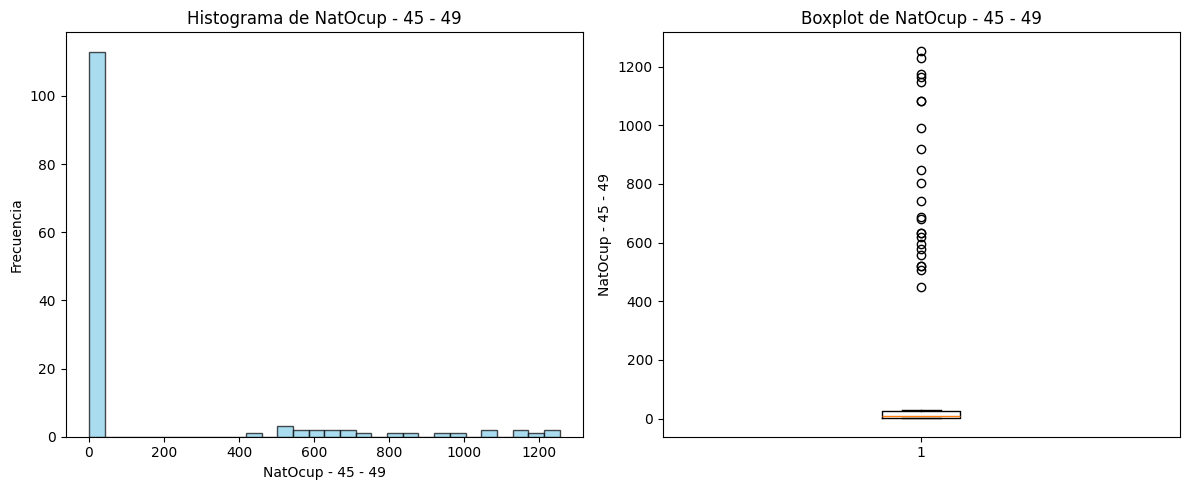

⚠️ La columna '50 y más' tiene 77 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.34601616957837788568
p-value = 0.00000000039461374314
Se rechaza la hipótesis nula: los datos de 'NatOcup - 50 y más' NO provienen de una distribución normal.



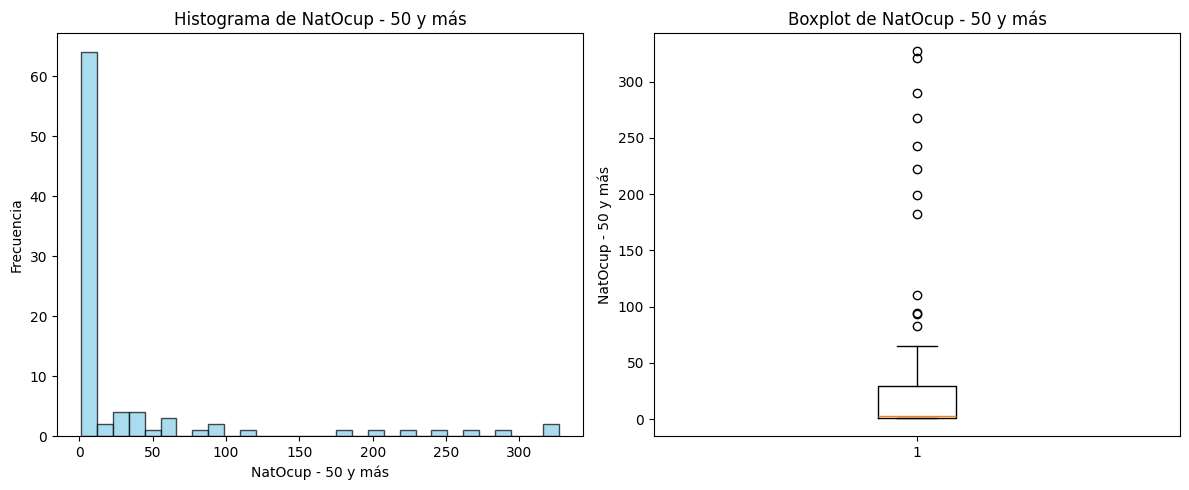

⚠️ La columna 'Ignorado' tiene 86 ceros en el archivo 'NatOcup'.
Estadístico de prueba (ks_statistic) = 0.47250154908809893772
p-value = 0.00000000000000004045
Se rechaza la hipótesis nula: los datos de 'NatOcup - Ignorado' NO provienen de una distribución normal.



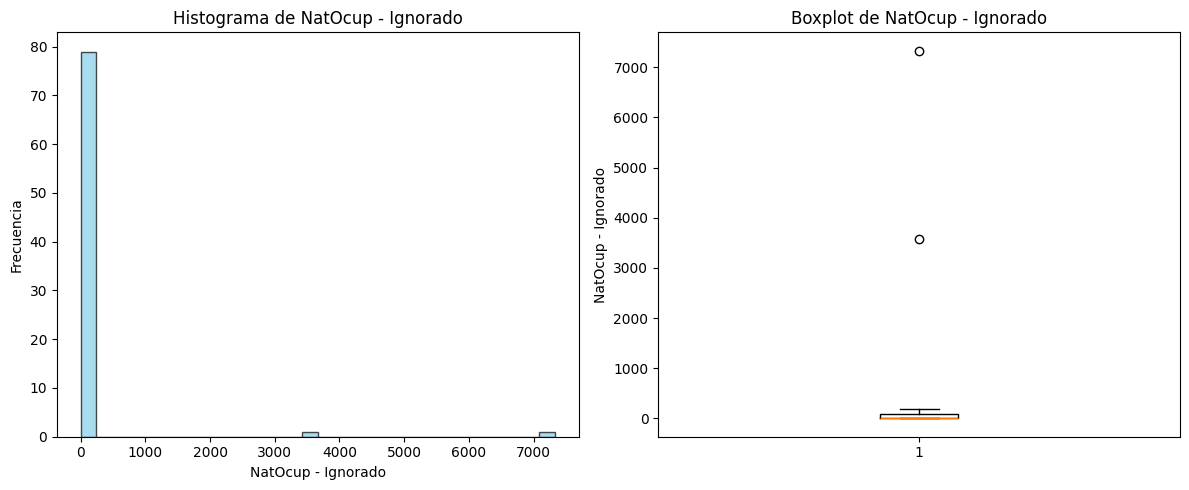

In [25]:
import normalidad

palabras_excluir = ["Todos", "Todas"]

for name, df in dfs.items():
    print("********************************************************************************************")
    print(f"\n🔹 **Analizando archivo: {name}**\n")
    cuantitiativas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cuantitiativas.remove('Anio')
    
    # Filtrar filas que contengan "Todos" o "Todas" en cualquier columna categórica
    df_filtrado = df[~df.select_dtypes(include=[object]).apply(lambda x: x.str.contains('|'.join(palabras_excluir), na=False)).any(axis=1)]
    
    for column in cuantitiativas:  # Solo columnas numéricas
        # Contar los ceros en la columna original
        num_zeros = (df_filtrado[column] == 0).sum()
        
        # Mostrar el número de ceros
        if num_zeros > 0:
            print(f"⚠️ La columna '{column}' tiene {num_zeros} ceros en el archivo '{name}'.")
        
        # Filtrar los ceros de la columna antes de la prueba
        df_filtrado_column = df_filtrado[column].loc[df_filtrado[column] != 0]
        
        # Realizar la prueba solo si hay datos disponibles después de filtrar los ceros
        if not df_filtrado_column.empty:
            normalidad.prueba_de_normalidad(df_filtrado_column, f"{name} - {column}")
        else:
            print(f"⚠️ No hay datos suficientes para realizar la prueba de normalidad en '{name} - {column}' después de eliminar ceros.\n")


#### Analisis por año

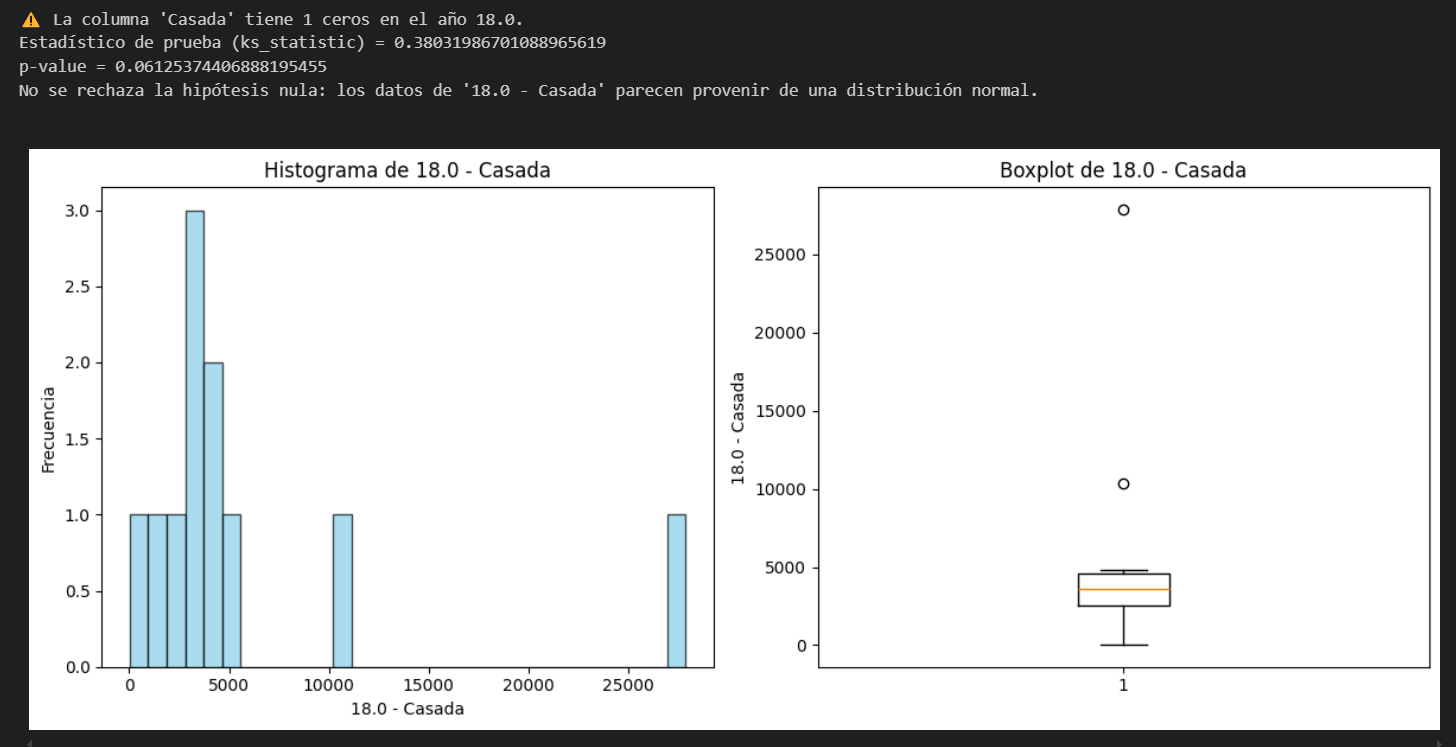

![image.png](attachment:image.png)


🔹 **Analizando archivo: NatDepEC**



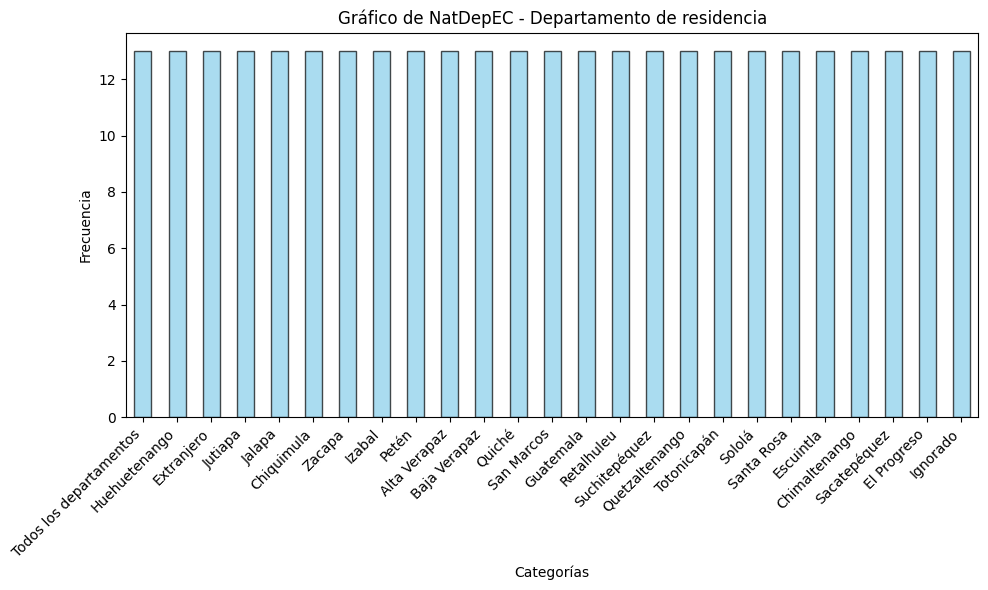

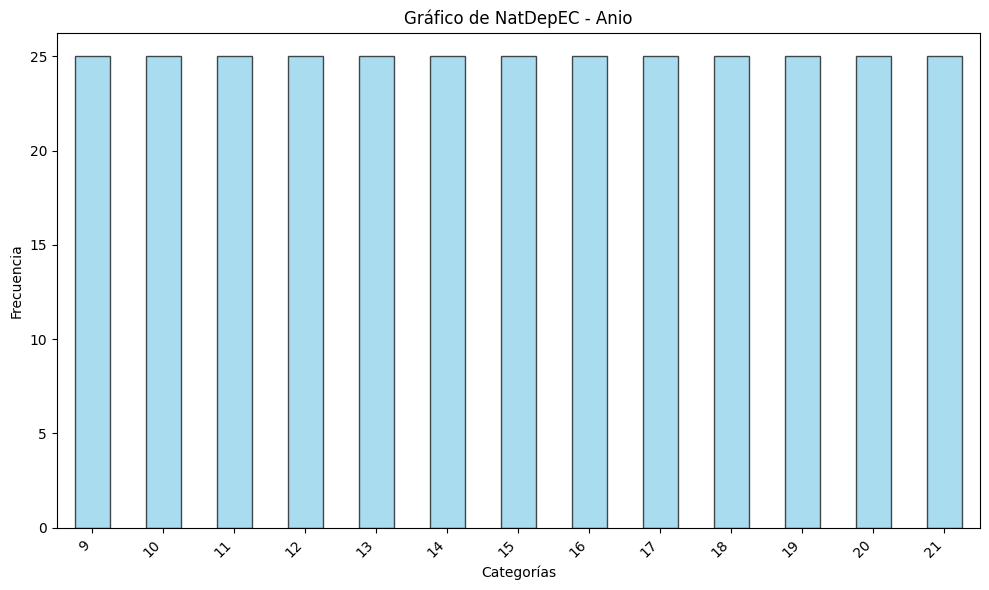


🔹 **Analizando archivo: NatDepMes**



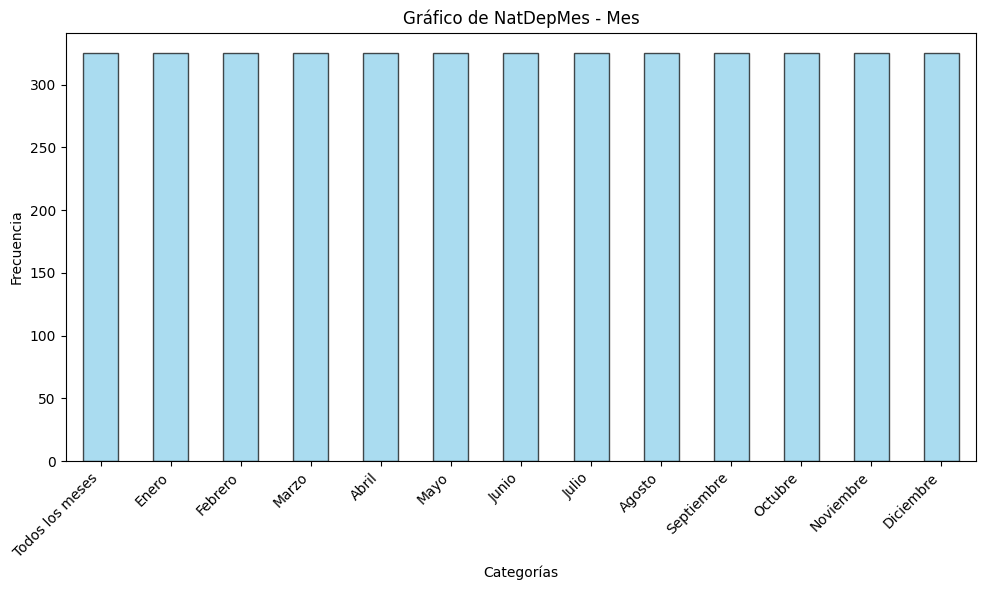

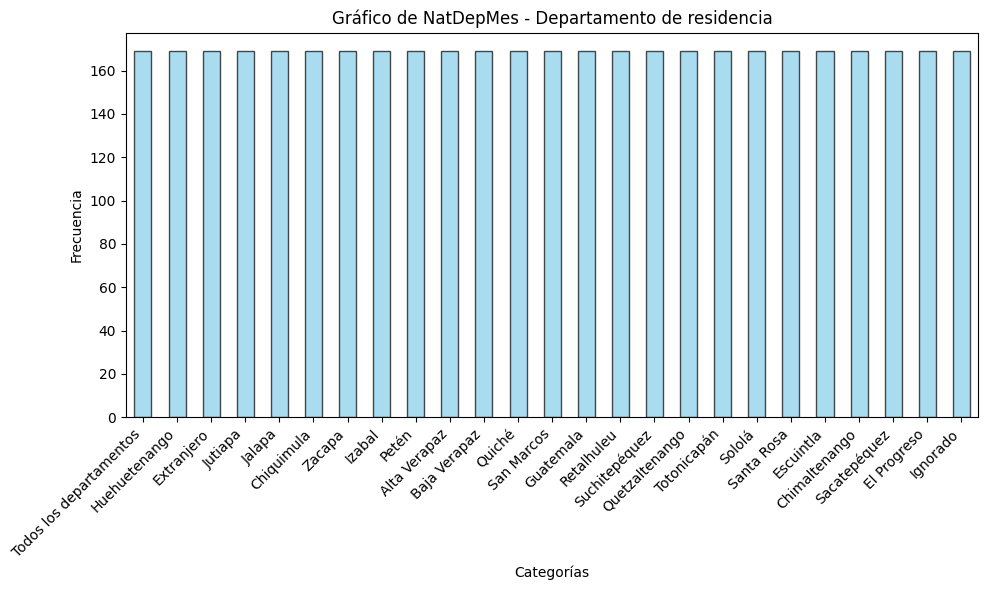

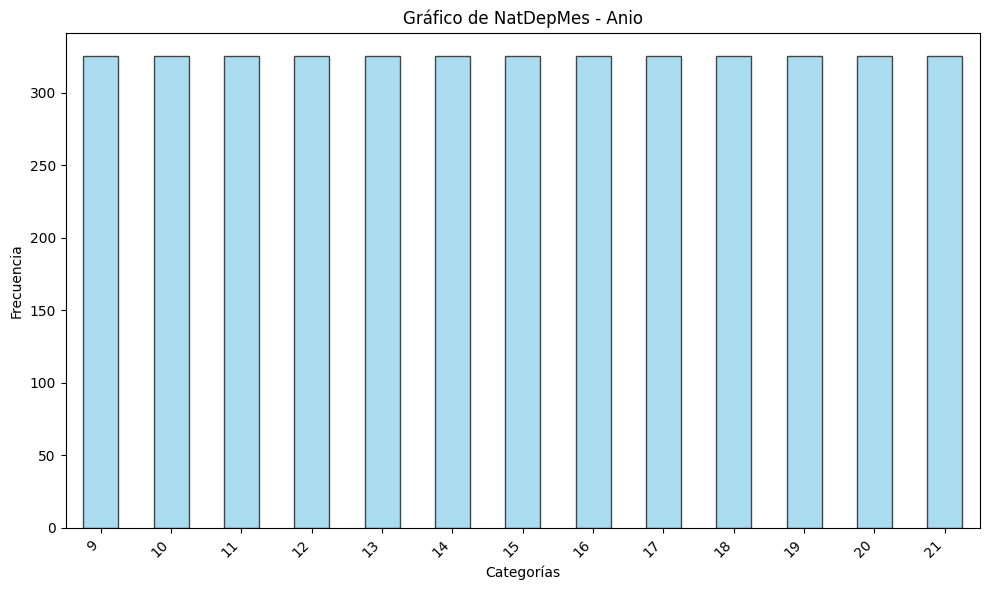


🔹 **Analizando archivo: NatEdad**



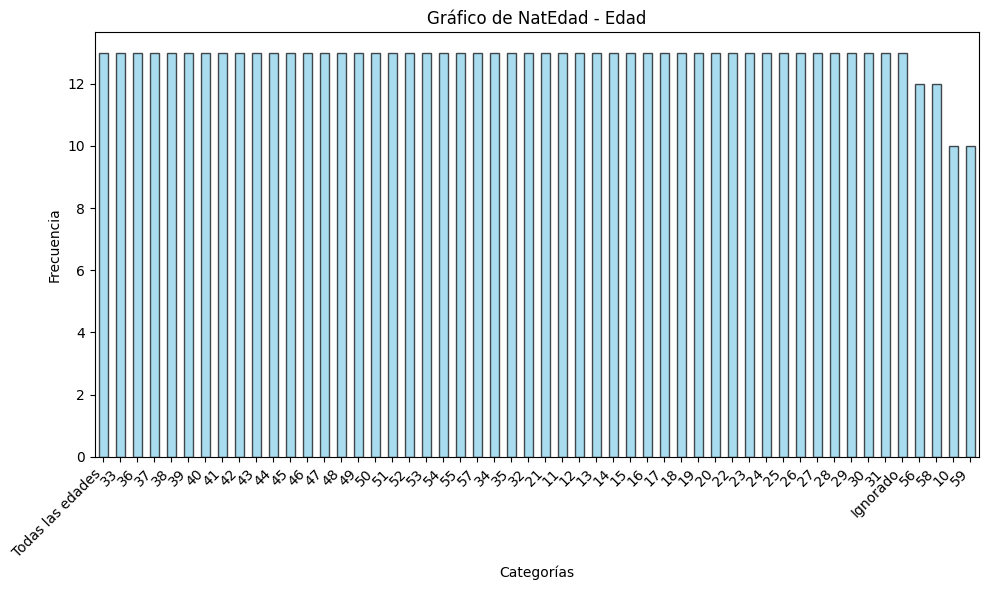

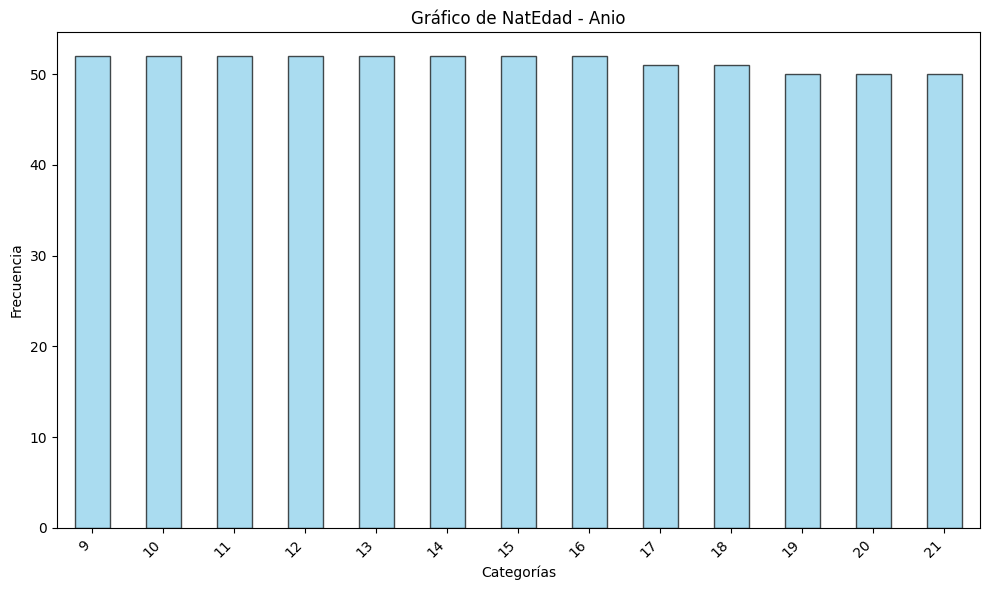


🔹 **Analizando archivo: NatEdadEC**



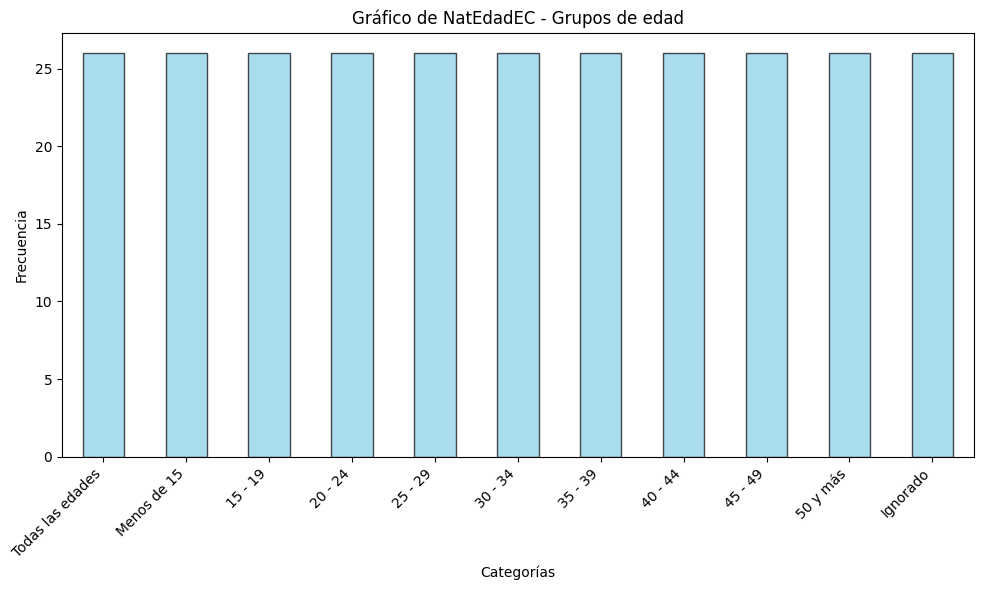

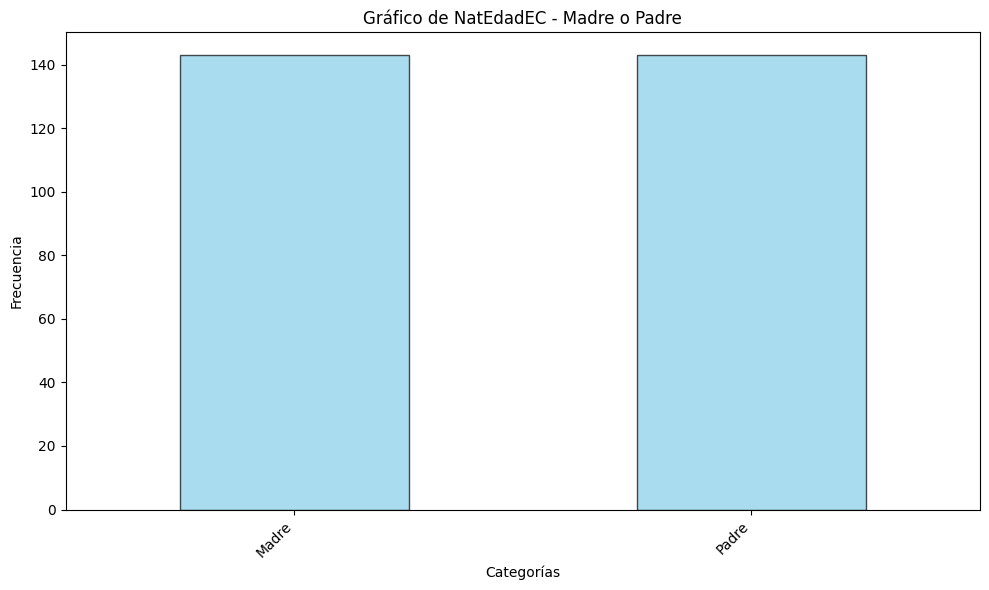

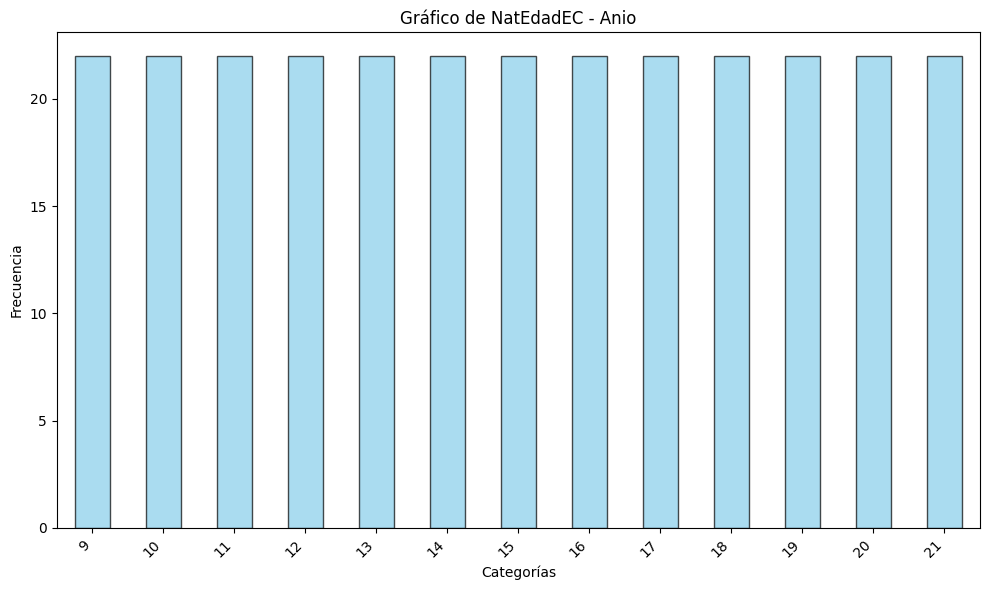


🔹 **Analizando archivo: NatEscolaridad**



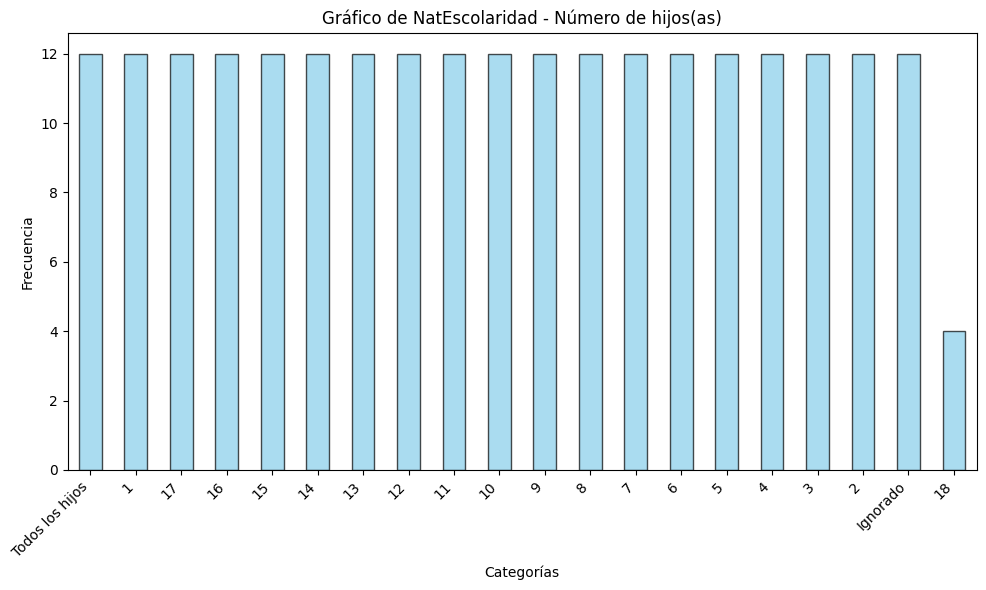

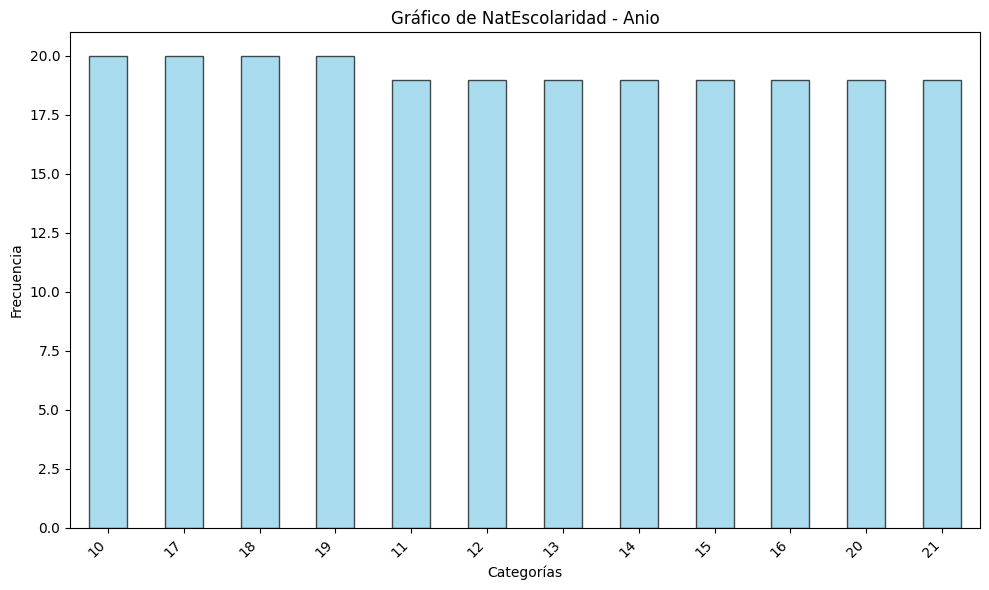


🔹 **Analizando archivo: NatNum**



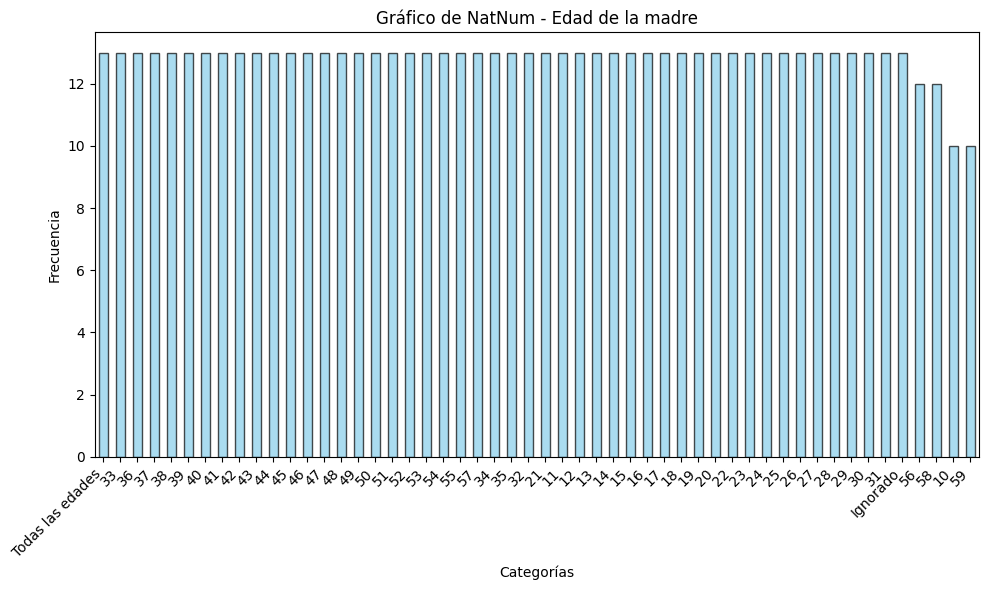

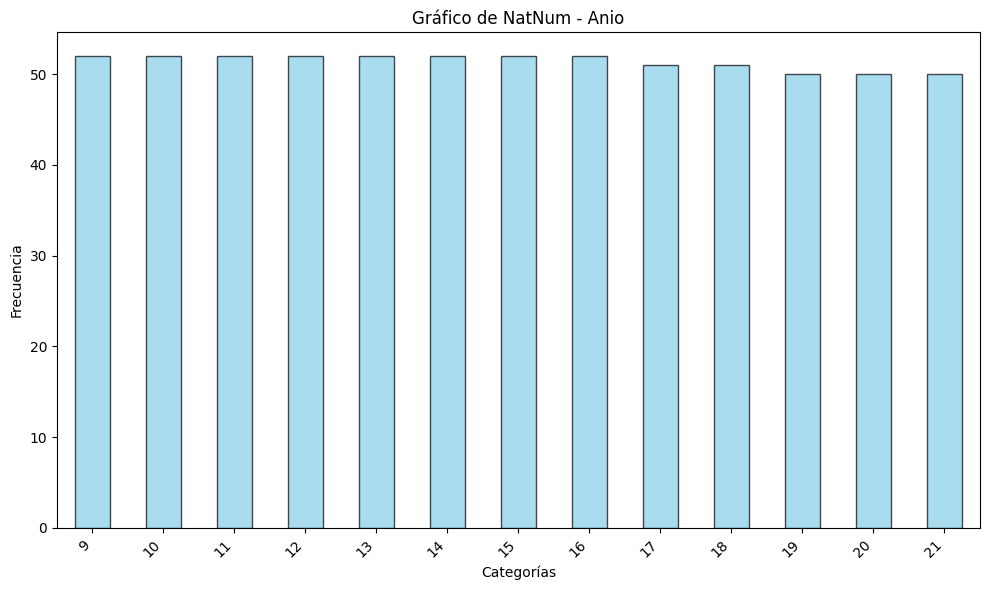


🔹 **Analizando archivo: NatOcup**



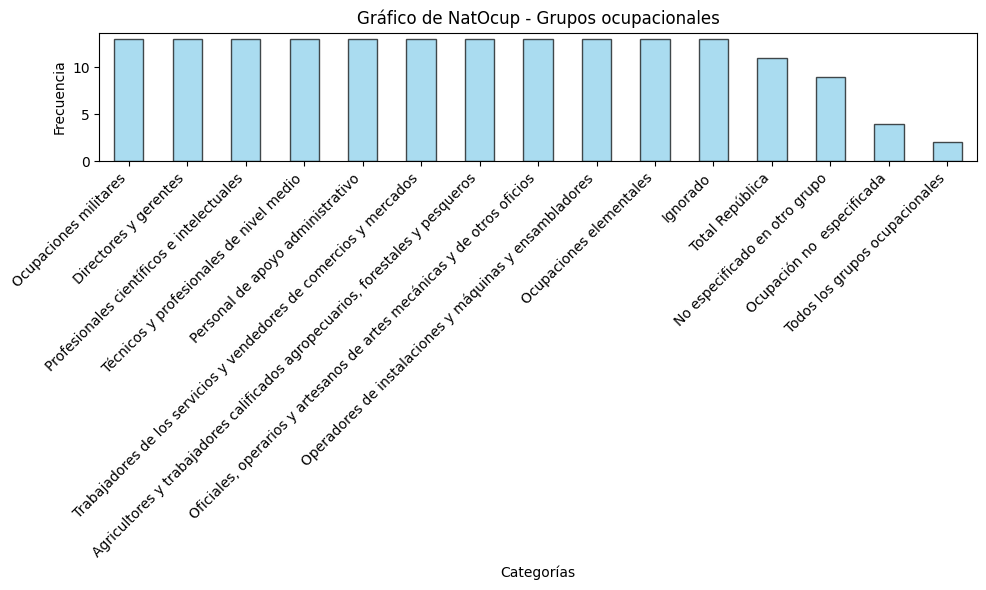

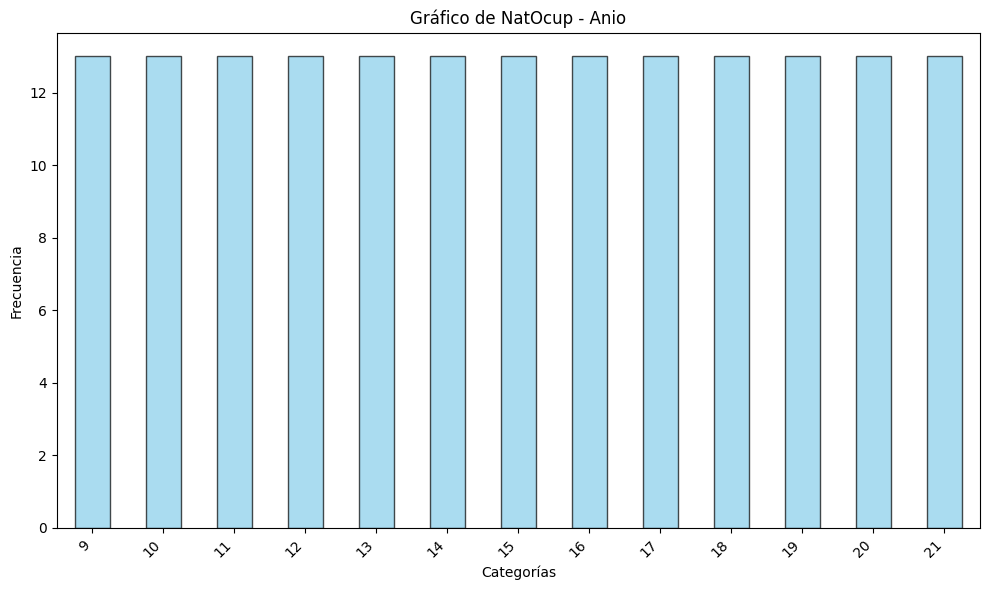

In [26]:
for name, df in dfs.items():
    print(f"\n🔹 **Analizando archivo: {name}**\n")
    cualitativas = df.select_dtypes(include=['object']).columns.tolist()
    cualitativas.append('Anio')
    
    for column in cualitativas:  # Solo columnas numéricas
        normalidad.frecuencias(df[column], f"{name} - {column}")

### Graficos Exploratorios

C:\Users\esteb\AppData\Local\Temp\ipykernel_27572\2361918428.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_natalidad["Total"] = pd.to_numeric(df_natalidad["Total"], errors="coerce")


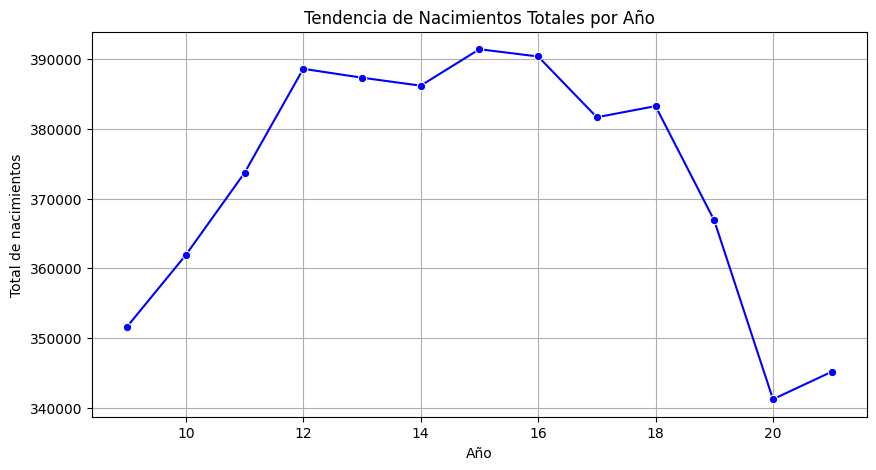

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_natalidad = dfs.get("NatDepEC")

if df_natalidad is not None:
    # Filtrar solo las filas de "Todos los departamentos"
    df_natalidad = df_natalidad[df_natalidad["Departamento de residencia"] == "Todos los departamentos"]

    # Convertir "Total" a numérico si aún no lo es
    df_natalidad["Total"] = pd.to_numeric(df_natalidad["Total"], errors="coerce")

    # Ordenar por año
    df_natalidad = df_natalidad.sort_values(by="Anio")

    # Graficar la tendencia
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df_natalidad, x="Anio", y="Total", marker="o", linestyle="-", color="b")

    plt.xlabel("Año")
    plt.ylabel("Total de nacimientos")
    plt.title("Tendencia de Nacimientos Totales por Año")
    plt.grid(True)
    plt.show()

else:
    print("No se encontró el DataFrame 'NatDepEC' en dfs.")

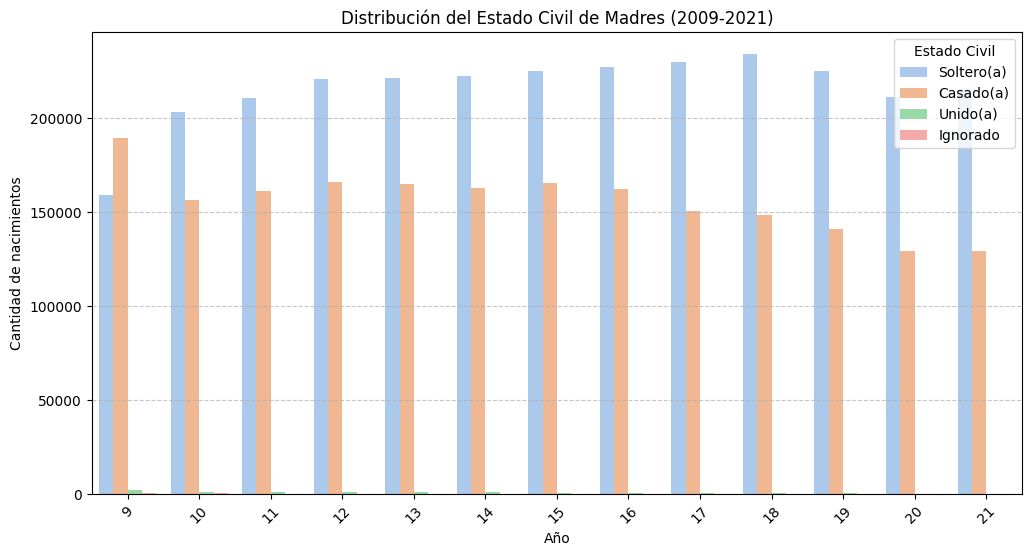

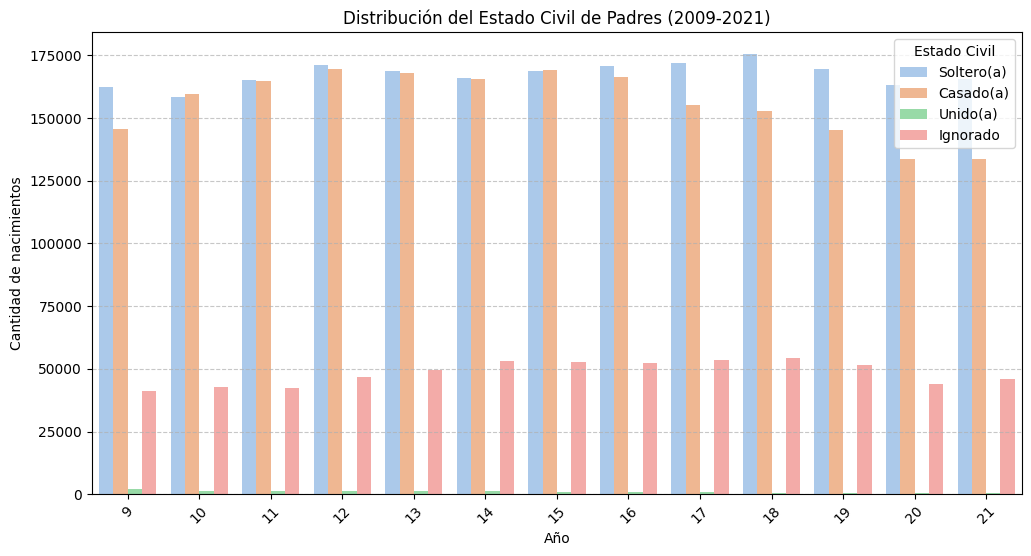

In [28]:

# Extraer el DataFrame desde la lista de dfs
df = dfs["NatEdadEC"]

# Convertir columnas a tipo numérico
for col in ["Soltero(a)", "Casado(a)", "Unido(a)", "Ignorado"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Convertir 'Anio' a numérico
df["Anio"] = pd.to_numeric(df["Anio"], errors="coerce")

# Filtrar solo filas donde 'Grupos de edad' sea "Todas las edades"
df_estado_civil = df[df["Grupos de edad"] == "Todas las edades"]

# Separar los datos por "Madre" y "Padre"
df_madre = df_estado_civil[df_estado_civil["Madre o Padre"] == "Madre"]
df_padre = df_estado_civil[df_estado_civil["Madre o Padre"] == "Padre"]

# Función para graficar el estado civil
def plot_estado_civil(df, title):
    # Derretir los datos para graficarlos
    df_melted = df.melt(
        id_vars=["Anio", "Madre o Padre"], 
        value_vars=["Soltero(a)", "Casado(a)", "Unido(a)", "Ignorado"], 
        var_name="Estado Civil", 
        value_name="Cantidad"
    )
    
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=df_melted, 
        x="Anio", 
        y="Cantidad", 
        hue="Estado Civil", 
        palette="pastel",
        dodge=True
    )

    plt.xlabel("Año")
    plt.ylabel("Cantidad de nacimientos")
    plt.title(title)
    plt.legend(title="Estado Civil")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Graficar para Madres
plot_estado_civil(df_madre, "Distribución del Estado Civil de Madres (2009-2021)")

# Graficar para Padres
plot_estado_civil(df_padre, "Distribución del Estado Civil de Padres (2009-2021)")


C:\Users\esteb\AppData\Local\Temp\ipykernel_27572\1315741655.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_padre_edad[col] = pd.to_numeric(df_padre_edad[col], errors="coerce")


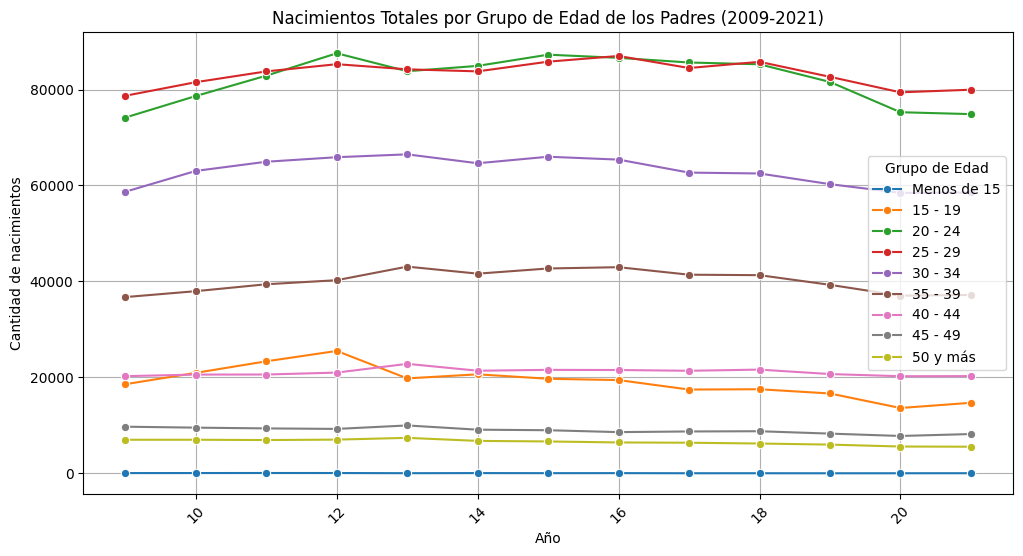

In [29]:
# Filtrar datos solo para padres (Madre o Padre == "Padre")
df_padre_edad = dfs['NatEdadEC'][dfs['NatEdadEC']["Madre o Padre"] == "Padre"]

# Convertir las columnas de nacimientos a numérico (si no lo son ya)
for col in ["Total", "Soltero(a)", "Casado(a)", "Unido(a)", "Ignorado"]:
    df_padre_edad[col] = pd.to_numeric(df_padre_edad[col], errors="coerce")

# Seleccionar las columnas de interés para el gráfico
df_padre_edad = df_padre_edad[["Grupos de edad", "Total", "Anio"]]

# Filtrar solo los grupos de edad
edad_grupos = ["Menos de 15", "15 - 19", "20 - 24", "25 - 29", "30 - 34", "35 - 39", "40 - 44", "45 - 49", "50 y más"]

df_padre_edad = df_padre_edad[df_padre_edad["Grupos de edad"].isin(edad_grupos)]

# Graficar nacimientos por grupo de edad de los padres
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_padre_edad, x="Anio", y="Total", hue="Grupos de edad", marker="o", palette="tab10")

# Etiquetas y título
plt.xlabel("Año")
plt.ylabel("Cantidad de nacimientos")
plt.title("Nacimientos Totales por Grupo de Edad de los Padres (2009-2021)")
plt.legend(title="Grupo de Edad")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\esteb\AppData\Local\Temp\ipykernel_27572\2578199905.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ocupaciones, x="Total", y="Grupos ocupacionales", palette="viridis")


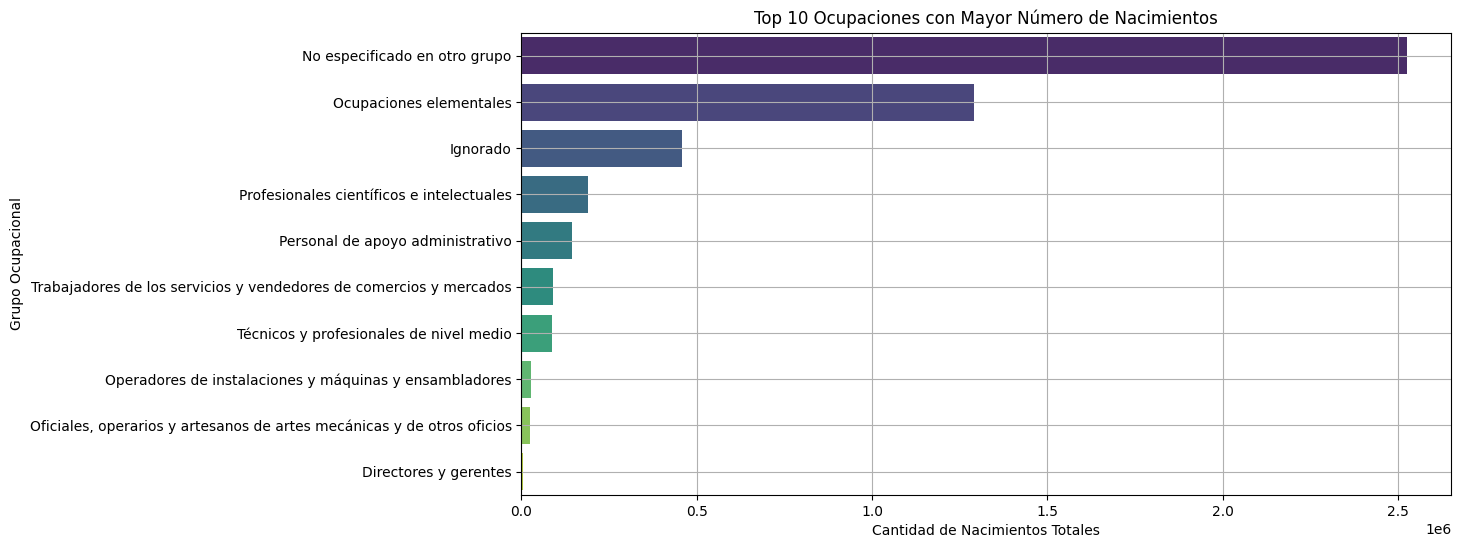

In [30]:
# Filtrar el DataFrame NatOcup para las columnas relevantes
df_ocupacion = dfs['NatOcup'][["Grupos ocupacionales", "Total", "Anio"]]

# Filtrar los grupos ocupacionales para eliminar "Total República"
df_ocupacion = df_ocupacion[~df_ocupacion["Grupos ocupacionales"].isin(["Total República", "Todos los grupos ocupacionales"])]

# Agrupar por ocupación para ver la cantidad total de nacimientos
df_ocupacion_totales = df_ocupacion.groupby("Grupos ocupacionales")["Total"].sum().reset_index()

# Ordenar las ocupaciones por el total de nacimientos
df_ocupacion_totales = df_ocupacion_totales.sort_values(by="Total", ascending=False)

# Graficar las ocupaciones más frecuentes (top 10)
top_ocupaciones = df_ocupacion_totales.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_ocupaciones, x="Total", y="Grupos ocupacionales", palette="viridis")

# Etiquetas y título
plt.xlabel("Cantidad de Nacimientos Totales")
plt.ylabel("Grupo Ocupacional")
plt.title("Top 10 Ocupaciones con Mayor Número de Nacimientos")
plt.grid(True)
plt.show()


C:\Users\esteb\AppData\Local\Temp\ipykernel_27572\348685996.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_mes_grouped_sorted, x="Mes", y="Total", palette="tab10")


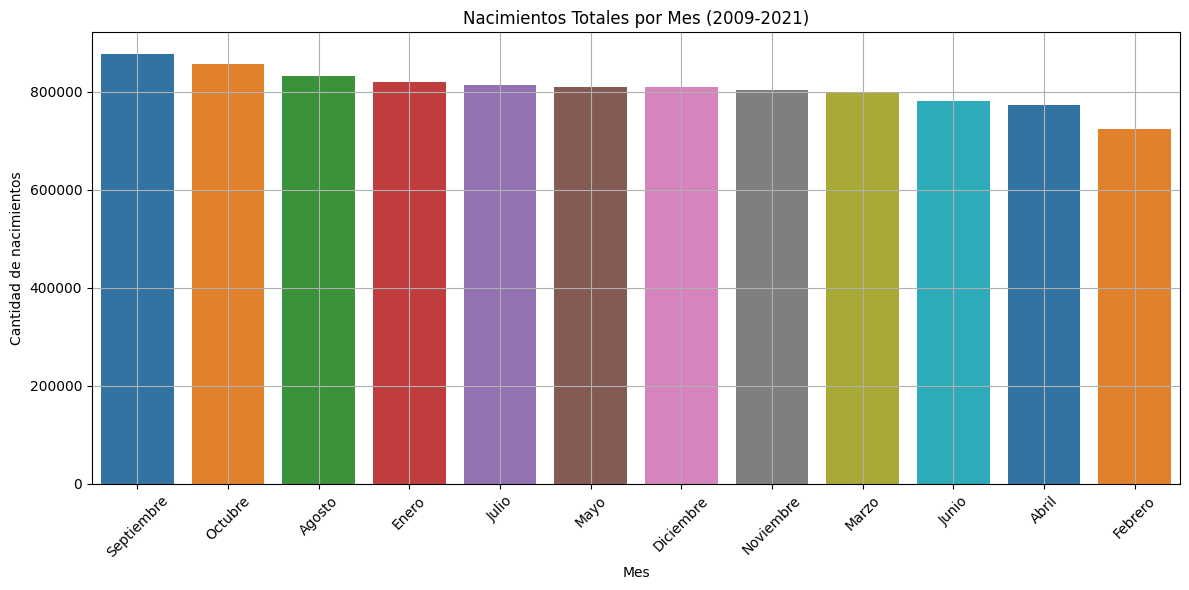

El mes con más nacimientos en total es Septiembre con 876924 nacimientos entre 2009 y 2021


In [31]:
# Filtrar el DataFrame NatDepMes para eliminar "Todos los meses" y "Todos los departamentos"
df_mes = dfs['NatDepMes'][~dfs['NatDepMes']["Mes"].isin(["Todos los meses", "Todos los departamentos"])]

# Agrupar solo por mes y sumar los nacimientos
df_mes_grouped = df_mes.groupby("Mes").sum().reset_index()

# Ordenar por la cantidad de nacimientos de mayor a menor
df_mes_grouped_sorted = df_mes_grouped.sort_values(by="Total", ascending=False)

# Graficar nacimientos totales por mes, ordenados de más a menos
plt.figure(figsize=(12, 6))
sns.barplot(data=df_mes_grouped_sorted, x="Mes", y="Total", palette="tab10")

# Etiquetas y título
plt.xlabel("Mes")
plt.ylabel("Cantidad de nacimientos")
plt.title("Nacimientos Totales por Mes (2009-2021)")

# Rotar las etiquetas de los meses y mostrar cuadrícula
plt.xticks(rotation=45)
plt.grid(True)

# Ajustar la visualización del gráfico
plt.tight_layout()
plt.show()

# Ver el mes con más nacimientos en total
mes_max_nacimientos_total = df_mes_grouped_sorted.loc[df_mes_grouped_sorted["Total"].idxmax()]
print(f"El mes con más nacimientos en total es {mes_max_nacimientos_total['Mes']} con {mes_max_nacimientos_total['Total']} nacimientos entre 2009 y 2021")



### Clustering

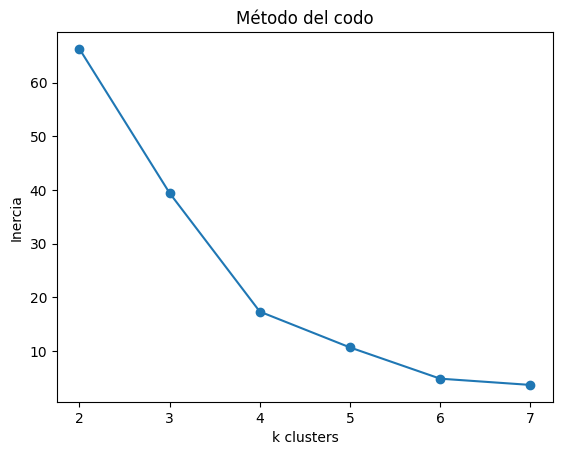

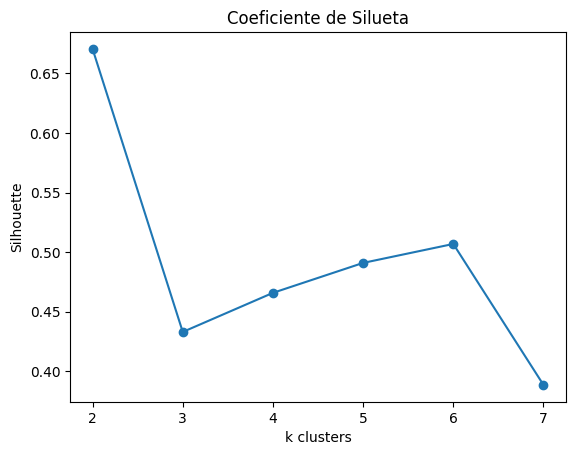

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Cargar y agregar por departamento
df = pd.read_csv("./data/nat/NatDepEC.csv")
df_agg = df.groupby("Departamento de residencia", as_index=False).agg({
    "Total":"sum","Soltera":"sum","Casada":"sum","Unida":"sum","Ignorado":"sum"
}).set_index("Departamento de residencia")

# Crear proporciones para eliminar efecto escala
X = df_agg.div(df_agg["Total"], axis=0).drop(columns="Total")

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo
inertia=[]
for k in range(2,8):
    km=KMeans(n_clusters=k, random_state=42)
    inertia.append(km.fit(X_scaled).inertia_)
plt.plot(range(2,8), inertia, marker="o")
plt.title("Método del codo")
plt.xlabel("k clusters"); plt.ylabel("Inercia")
plt.show()

# Método de la silueta
scores=[]
for k in range(2,8):
    km=KMeans(n_clusters=k, random_state=42)
    labels=km.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, labels))
plt.plot(range(2,8), scores, marker="o")
plt.title("Coeficiente de Silueta")
plt.xlabel("k clusters"); plt.ylabel("Silhouette")
plt.show()


In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_agg["cluster"] = kmeans.fit_predict(X_scaled)

# Tabla resumen por cluster
cluster_summary = df_agg.groupby("cluster").mean()
cluster_counts  = df_agg["cluster"].value_counts().sort_index()
cluster_props = (cluster_summary.div(cluster_summary["Total"], axis=0) * 100).round(2)

porcentaje_ignorado = (cluster_summary["Ignorado"] / cluster_summary["Total"] * 100).round(2)

print("=== Resumen de clusters ===")
print(cluster_summary.round(2))
print("\n=== Tamaño de cada cluster ===")
print(cluster_counts)
print("\n=== Proporciones (%) por estado civil ===")
print(cluster_props.drop(columns="Total"))
print("\n=== Porcentaje de nacimientos 'Ignorados' por cluster ===")
print(porcentaje_ignorado)

=== Resumen de clusters ===
             Total    Soltera     Casada    Unida  Ignorado
cluster                                                    
0          1259.00     389.00     355.00     0.00    515.00
1        168191.92  108199.25   59145.83   729.58    117.25
2        639924.17  359385.17  278824.25  1368.75    346.00

=== Tamaño de cada cluster ===
cluster
0     1
1    12
2    12
Name: count, dtype: int64

=== Proporciones (%) por estado civil ===
         Soltera  Casada  Unida  Ignorado
cluster                                  
0          30.90   28.20   0.00     40.91
1          64.33   35.17   0.43      0.07
2          56.16   43.57   0.21      0.05

=== Porcentaje de nacimientos 'Ignorados' por cluster ===
cluster
0    40.91
1     0.07
2     0.05
dtype: float64


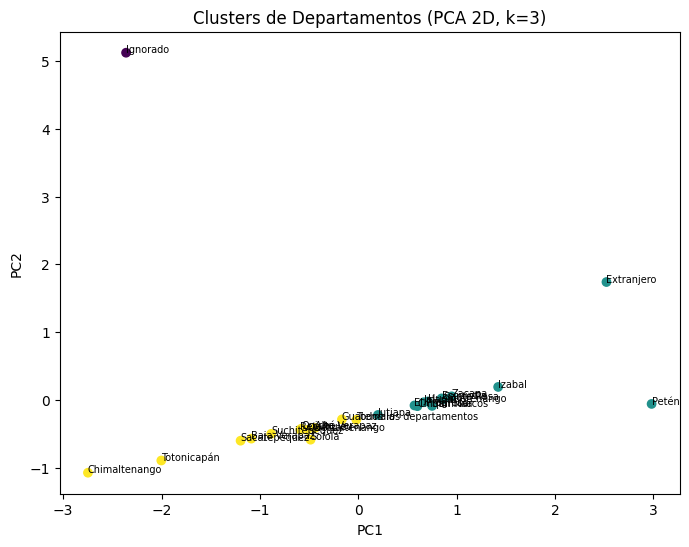

In [34]:
# Visualización PCA de los clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(coords[:,0], coords[:,1], c=df_agg["cluster"], cmap='viridis')
for i, depto in enumerate(df_agg.index):
    plt.annotate(depto, (coords[i,0], coords[i,1]), fontsize=7)
plt.title("Clusters de Departamentos (PCA 2D, k=3)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [35]:
# Mostrar nombres de departamentos por cluster
departamentos_por_cluster = df_agg.reset_index()[["Departamento de residencia", "cluster"]]
departamentos_ordenados = departamentos_por_cluster.sort_values("cluster")

print("=== Departamentos por cluster ===")
for k in sorted(departamentos_ordenados["cluster"].unique()):
    print(f"\nCluster {k}:")
    deptos = departamentos_ordenados[departamentos_ordenados["cluster"] == k]["Departamento de residencia"]
    for d in deptos:
        print(f" - {d}")

=== Departamentos por cluster ===

Cluster 0:
 - Ignorado

Cluster 1:
 - Jutiapa
 - Santa Rosa
 - San Marcos
 - Petén
 - Jalapa
 - Izabal
 - Huehuetenango
 - Zacapa
 - Extranjero
 - Escuintla
 - El Progreso
 - Chiquimula

Cluster 2:
 - Totonicapán
 - Quetzaltenango
 - Quiché
 - Retalhuleu
 - Sacatepéquez
 - Chimaltenango
 - Baja Verapaz
 - Sololá
 - Suchitepéquez
 - Todos los departamentos
 - Guatemala
 - Alta Verapaz


In [36]:
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Porcentaje de varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_ * 100  # en porcentaje

# Mostrar resultados
print("=== Varianza explicada por cada componente principal ===")
print(f"PC1: {varianza_explicada[0]:.2f}%")
print(f"PC2: {varianza_explicada[1]:.2f}%")
print(f"Total acumulado: {varianza_explicada.sum():.2f}%")

=== Varianza explicada por cada componente principal ===
PC1: 43.82%
PC2: 33.54%
Total acumulado: 77.36%
